In [9]:
import numpy as np
import json
import math

In [2]:
# Please change this before you proceed
dataDir="/home/fanghan/Work/UB-SPEBT/Develop/data/2023/"

In [34]:
with open(dataDir+'Parameters.json') as json_file:
    parameters = json.load(json_file)
# Matrix dimension 90*90*32*6*8
NImgX_ = parameters["numImageX"]
NImgY_ = parameters["numImageY"]
NDetY_ = parameters["pixelSiPM"]
NModule_ = parameters["numPanel"]
NDetX_ = parameters["numDetectorLayer"]

fName = 'sysmat_24layer_Rot_0_of_2_2mmslitin10mm_1010_idxT0_numT1in1mm_IZ0_DZ0_100.sysmat'

data = np.fromfile('%s%s' % (dataDir, fName), dtype='single')
dataMatrix = data.reshape((NDetX_ * NModule_*NDetY_, NImgX_*NImgY_))

In [35]:
aperture_width = parameters["widthSlitY"]
aperture_pitch = parameters["slitGapY"]
print(aperture_pitch)
plate_thick = 2.0
N_slits=math.floor((107.52-aperture_width)/aperture_pitch)+1
print(f"No of slits: {N_slits}")
      
apt_y_0=(107.520-int(N_slits-1)*aperture_pitch)*0.5
aperture_y = np.arange(apt_y_0,107.52,aperture_pitch)
detector_y = np.arange(1.68,107.52,3.36)
aperture_x = np.ones(aperture_y.size)*plate_thick*0.5
detector_x = np.linspace(np.zeros(detector_y.size),np.ones(detector_y.size)*7,8,axis=0)*3.36+(1.68+plate_thick)
detector_x = detector_x + 190
aperture_x = aperture_x + 190
aperture_y = aperture_y + 36.24
detector_y = detector_y + 36.24

5
No of slits: 21


In [13]:

import matplotlib
import matplotlib.pyplot as plt
my_cmap = matplotlib.colormaps.get_cmap('turbo')

In [7]:
dIdxY=16
dIdxX=2

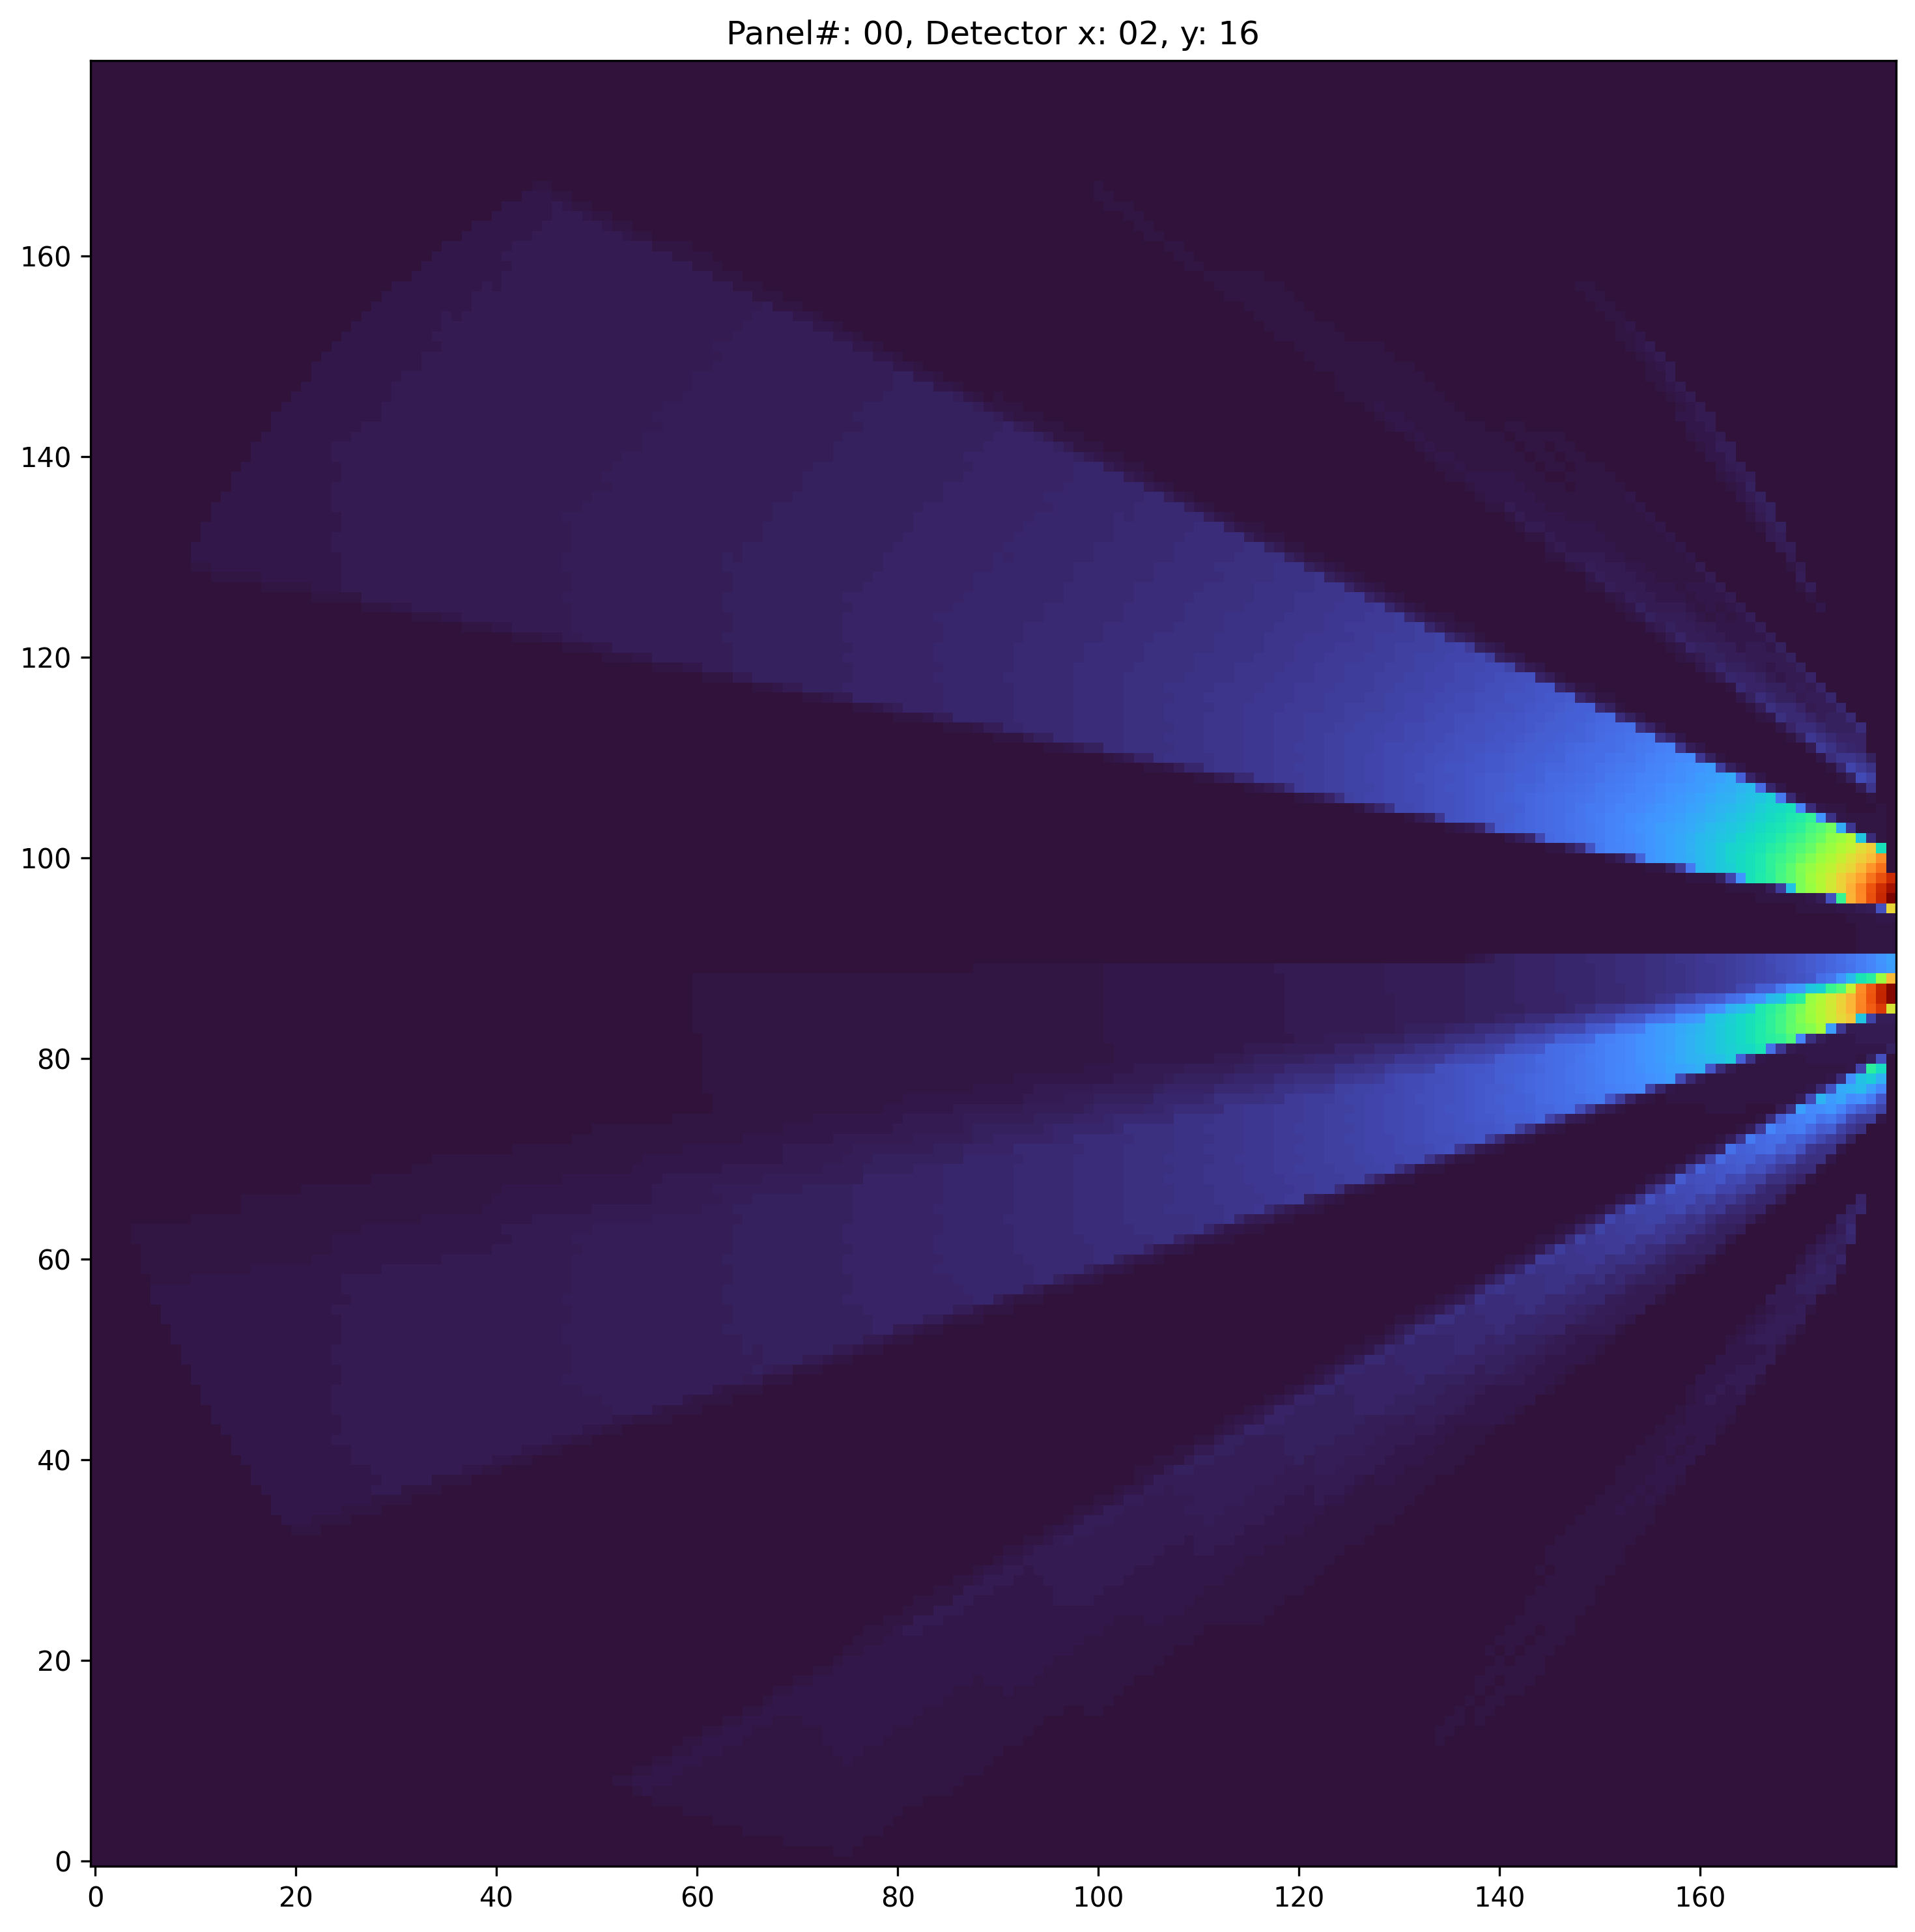

In [16]:
dataImage=dataMatrix.reshape((NDetX_, NModule_, NDetY_, NImgX_, NImgY_))
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots()
imshow_obj=ax.imshow(dataImage[dIdxX,0,dIdxY,:,:], cmap=my_cmap,origin='lower')
pltTitle=ax.set_title('Panel#: {:02d}, Detector x: {:02d}, y: {:02d}'.format(0, dIdxX, dIdxY))


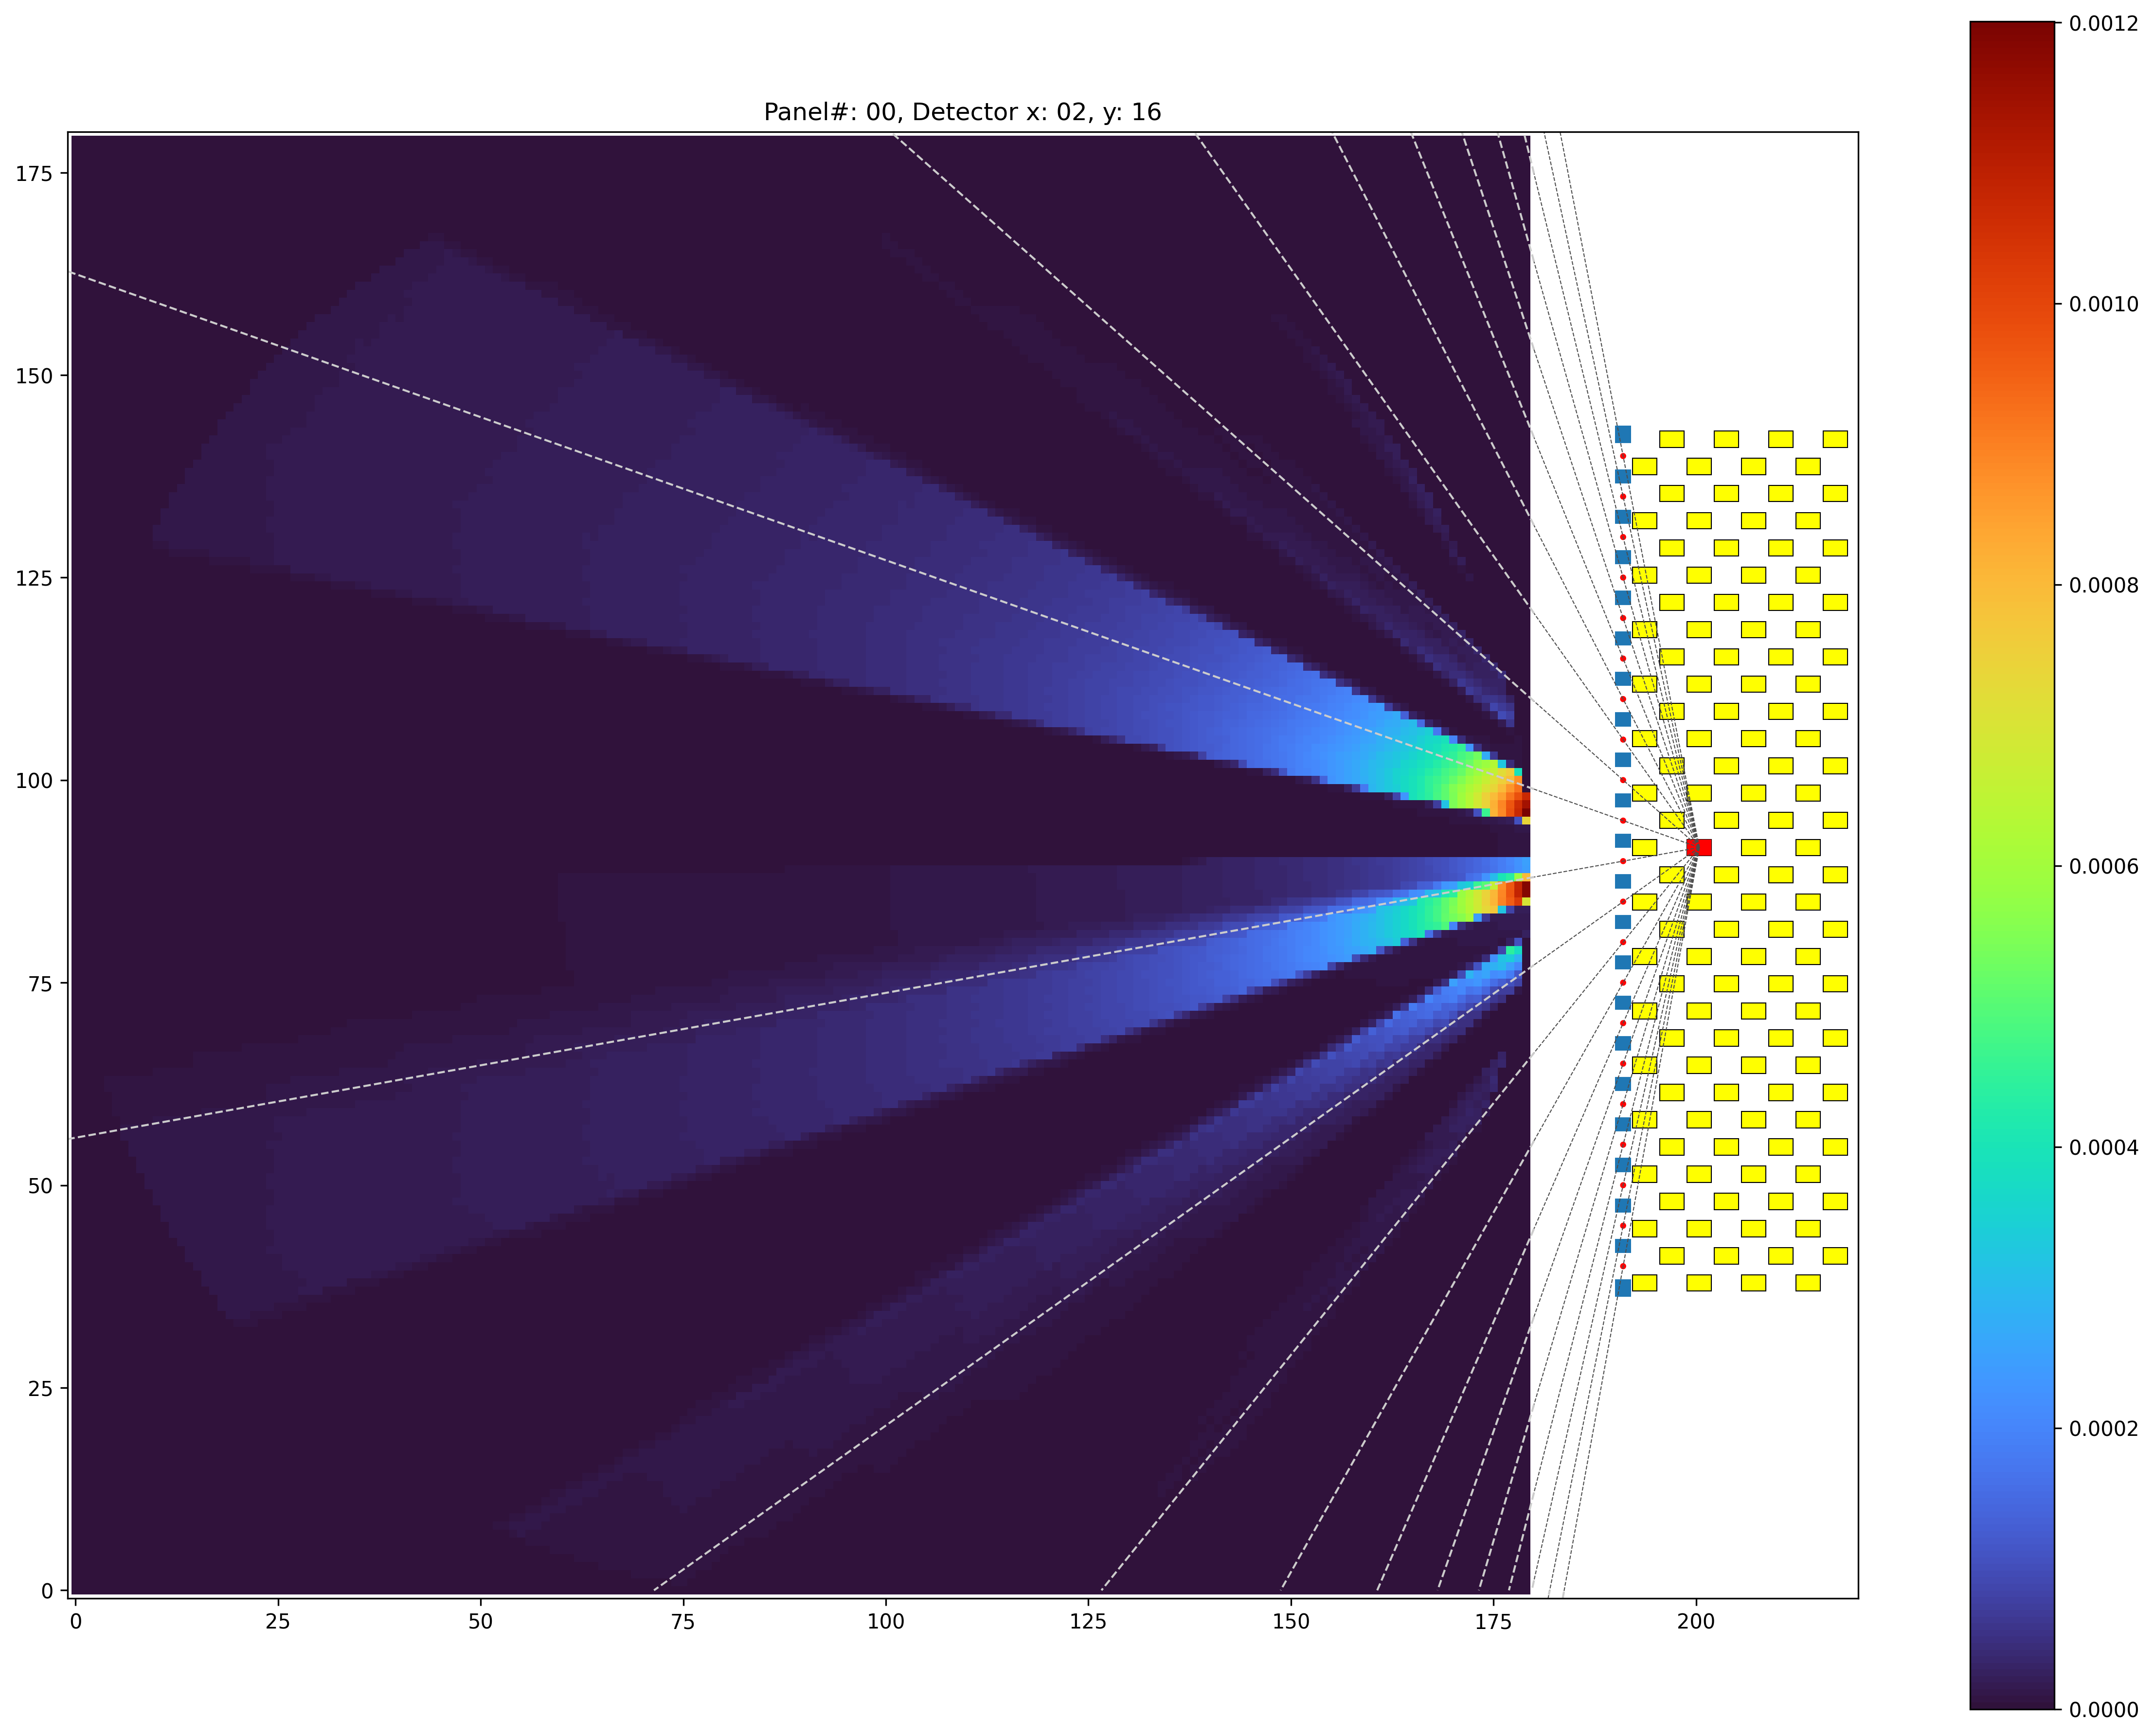

In [36]:
patches=matplotlib.patches
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots()
aperture_width = parameters["widthSlitY"]
aperture_pitch = parameters["slitGapY"]
ax.add_patch(patches.Rectangle((190,(180-107.52)*0.5),plate_thick,107.52))
for ele in np.column_stack((aperture_x, aperture_y)):
    x = ele[0]-plate_thick*0.5
    y = ele[1]-aperture_width*0.5
    ax.add_patch(patches.Rectangle((x, y), plate_thick, aperture_width, color='white'))
    ax.add_patch(patches.Circle((ele[0],ele[1]), radius=0.25, color='red'))   
detIdx=0
for xlayerIdx in range(0,8):
    for ele in np.column_stack((detector_x[xlayerIdx], detector_y)):
        x = ele[0]-3.0*0.5
        y = ele[1]-2.0*0.5
        if (detIdx%2) == 0 :
            ax.add_patch(patches.Rectangle((x, y), 3.0, 2.0, facecolor='yellow',linewidth=0.5,edgecolor='black'))
        detIdx = detIdx + 1
    detIdx = detIdx + 1

pltTitle=ax.set_title('Panel#: {:02d}, Detector x: {:02d}, y: {:02d}'.format(0, dIdxX, dIdxY))
imshow_obj=ax.imshow(dataImage[dIdxX,0,dIdxY,:,:], cmap=my_cmap,origin='lower')
# imshow_obj=ax.imshow(dataImage[dIdxX,0,dIdxY,:,:], cmap=mpl.colormaps['turbo'],origin='lower')

for i in range (0,21):
    centerline_k = (detector_y[dIdxY]-aperture_y[i])/(detector_x[dIdxX,dIdxY]-aperture_x[i])
    centerline_b = aperture_y[i] - centerline_k*aperture_x[i]
    x1=[detector_x[dIdxX,dIdxY]]
    y1=[detector_y[dIdxY]]
    x1.append(180)
    y1.append(180*centerline_k+centerline_b)
    x2 = [180]
    y2 = [180*centerline_k+centerline_b]
    if centerline_k > 0 :
        y2.append(0)
        x2.append((0-centerline_b)/centerline_k)
    else:
        y2.append(180)
        x2.append((180-centerline_b)/centerline_k)
    ax.plot(x1,y1,linestyle='--',linewidth=0.5,color='0.3')
    ax.plot(x2,y2,linestyle='--',linewidth=1,color='0.8')
ax.set_ylim(-1,180)
ax.set_xlim(-1,220)
ax.add_patch(patches.Rectangle((detector_x[dIdxX,dIdxY]-3.0*0.5,detector_y[dIdxY]-2.0*0.5),3.0,2.0,facecolor = 'red'))
cbar=plt.colorbar(imshow_obj)
# ax.add_patch(patches.Circle((150,60), radius=0.25, color='red')) 
fig.tight_layout()
# plt.savefig("test_{:d}_{:d}.png".format(dIdxX,dIdxY))

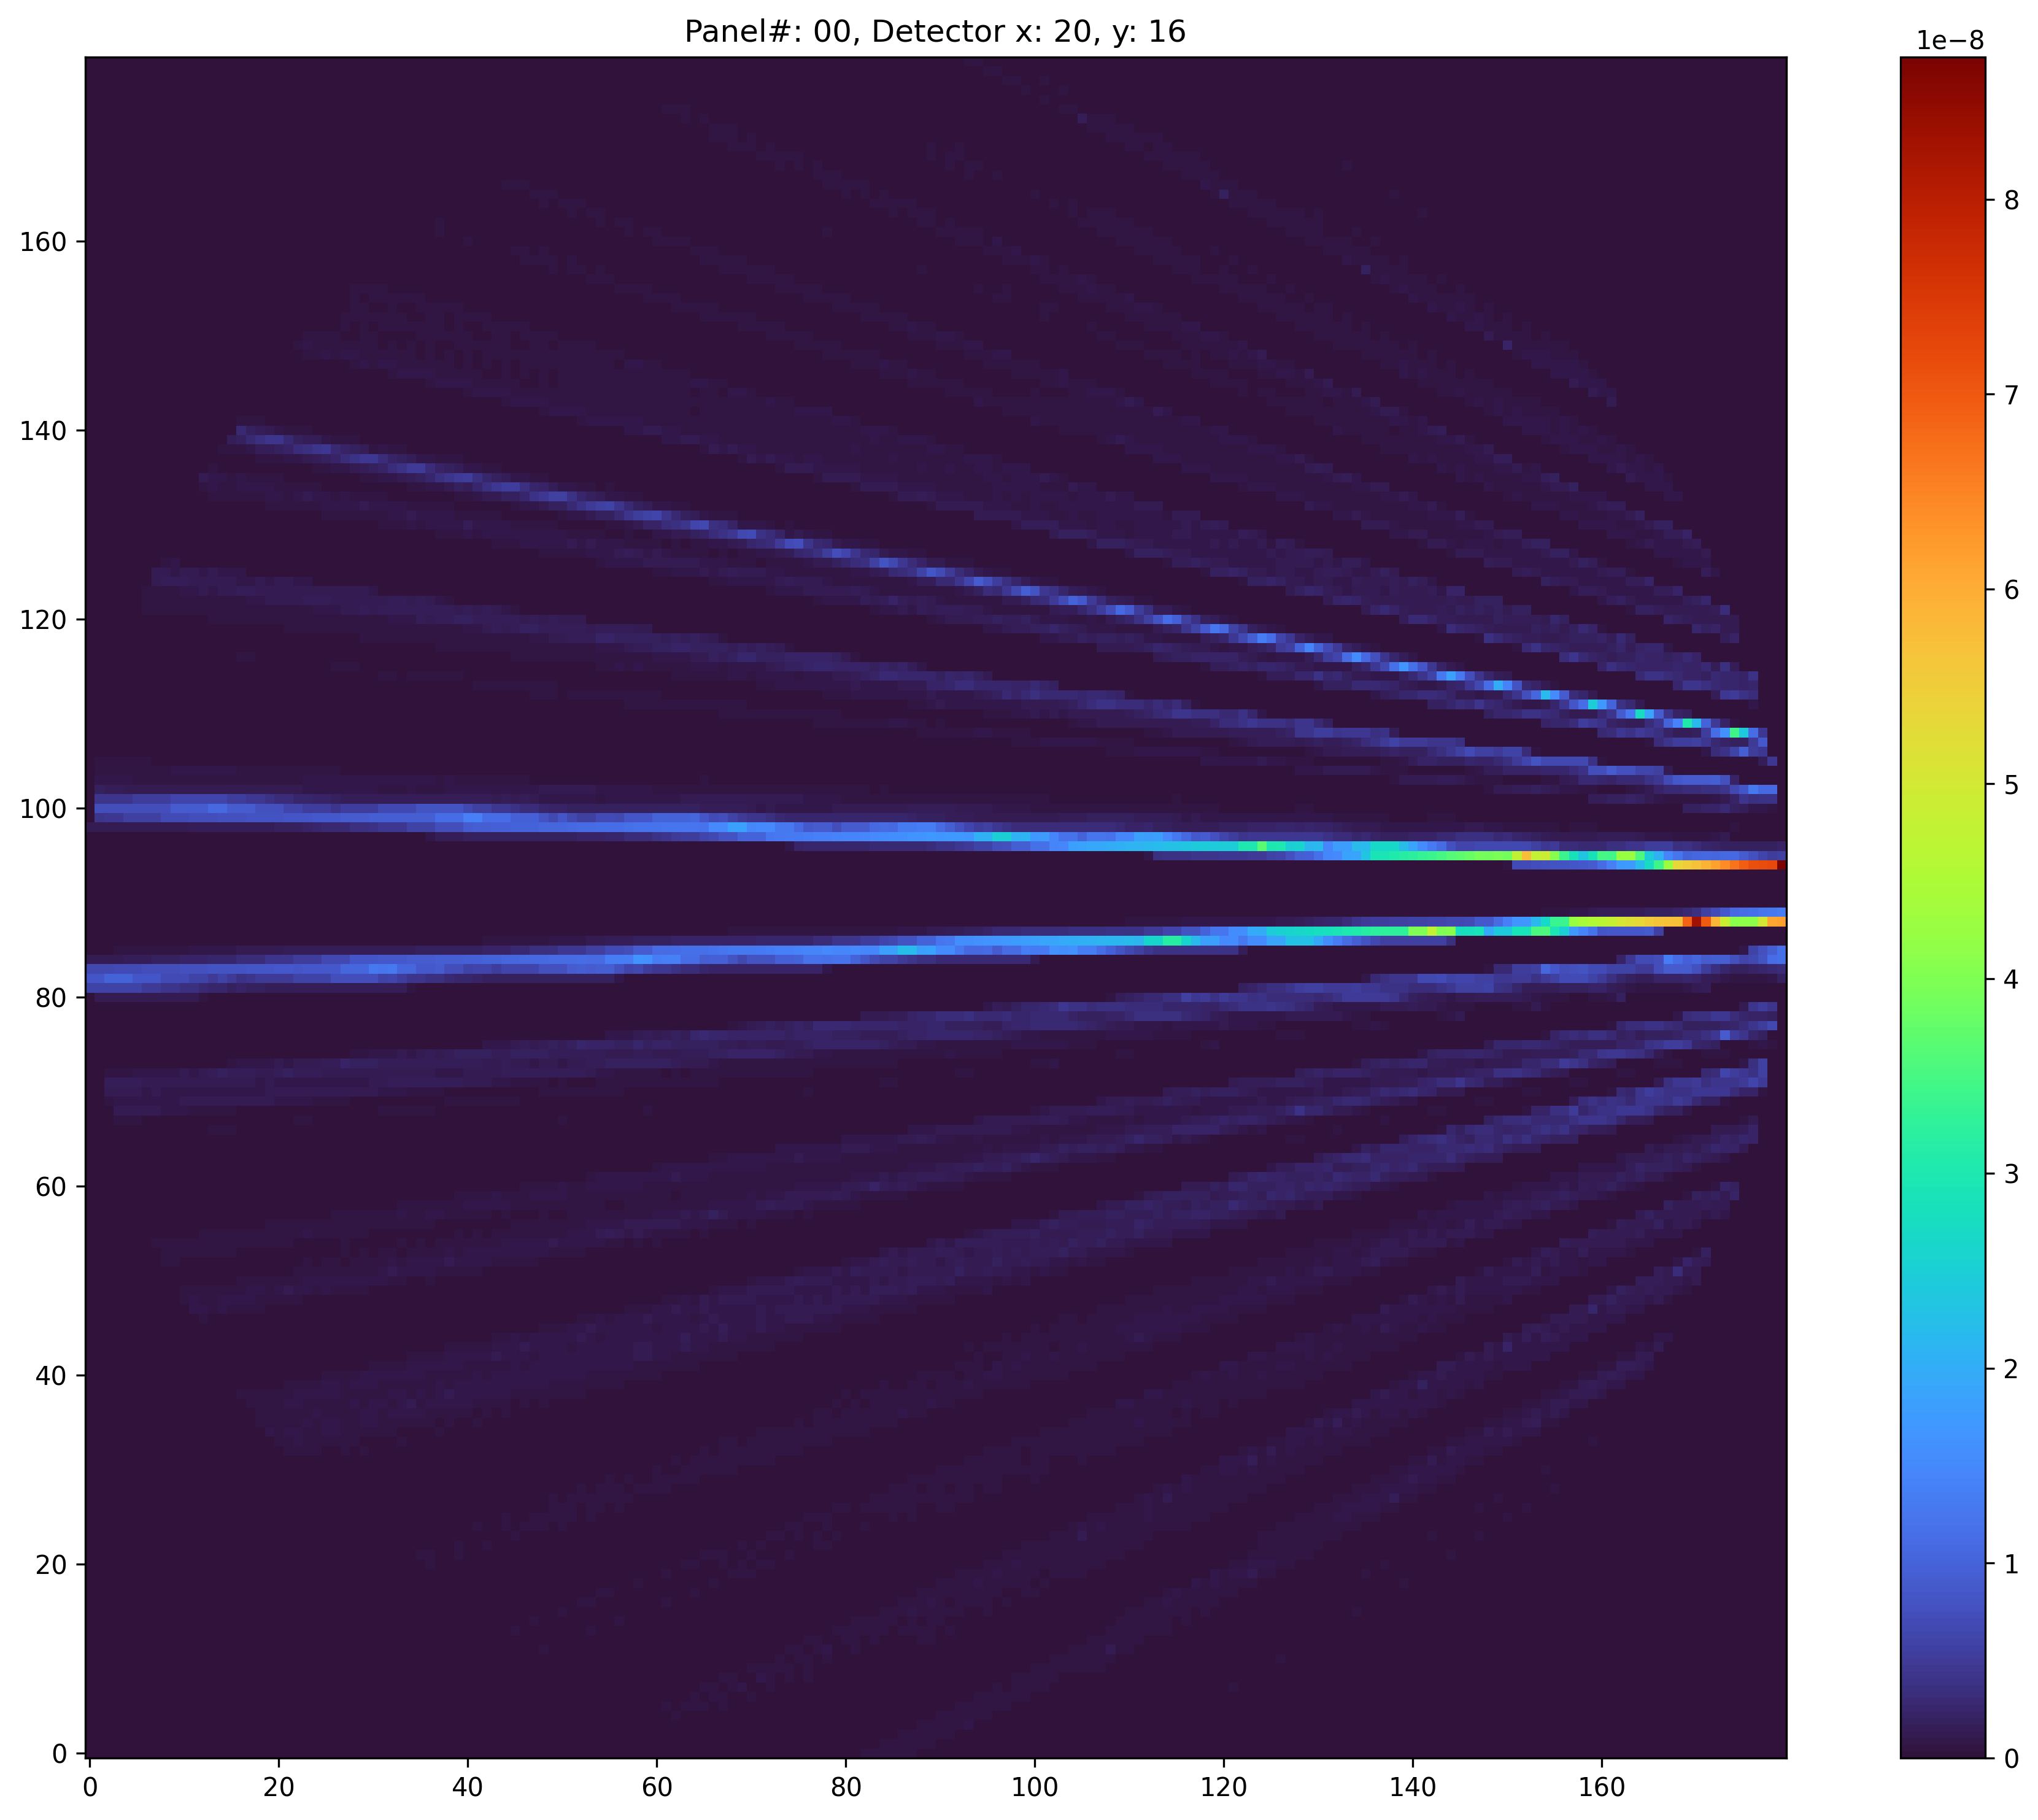

In [38]:
dIdxX=20
dIdxY=16
dataImage=dataMatrix.reshape((NDetX_, NModule_, NDetY_, NImgX_, NImgY_))
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots()
imshow_obj=ax.imshow(dataImage[dIdxX,0,dIdxY,:,:], cmap=my_cmap,origin='lower')
pltTitle=ax.set_title('Panel#: {:02d}, Detector x: {:02d}, y: {:02d}'.format(0, dIdxX, dIdxY))
plt.colorbar(imshow_obj)

In [82]:
mybins=[0]
for v in np.arange(1,11,0.2):
    bin_edge=10**(v-13)
    mybins.append(bin_edge)
# print(np.arange(1,11,0.2).shape)
hist, bins=np.histogram(dataImage[np.nonzero(dataImage)],bins=mybins)

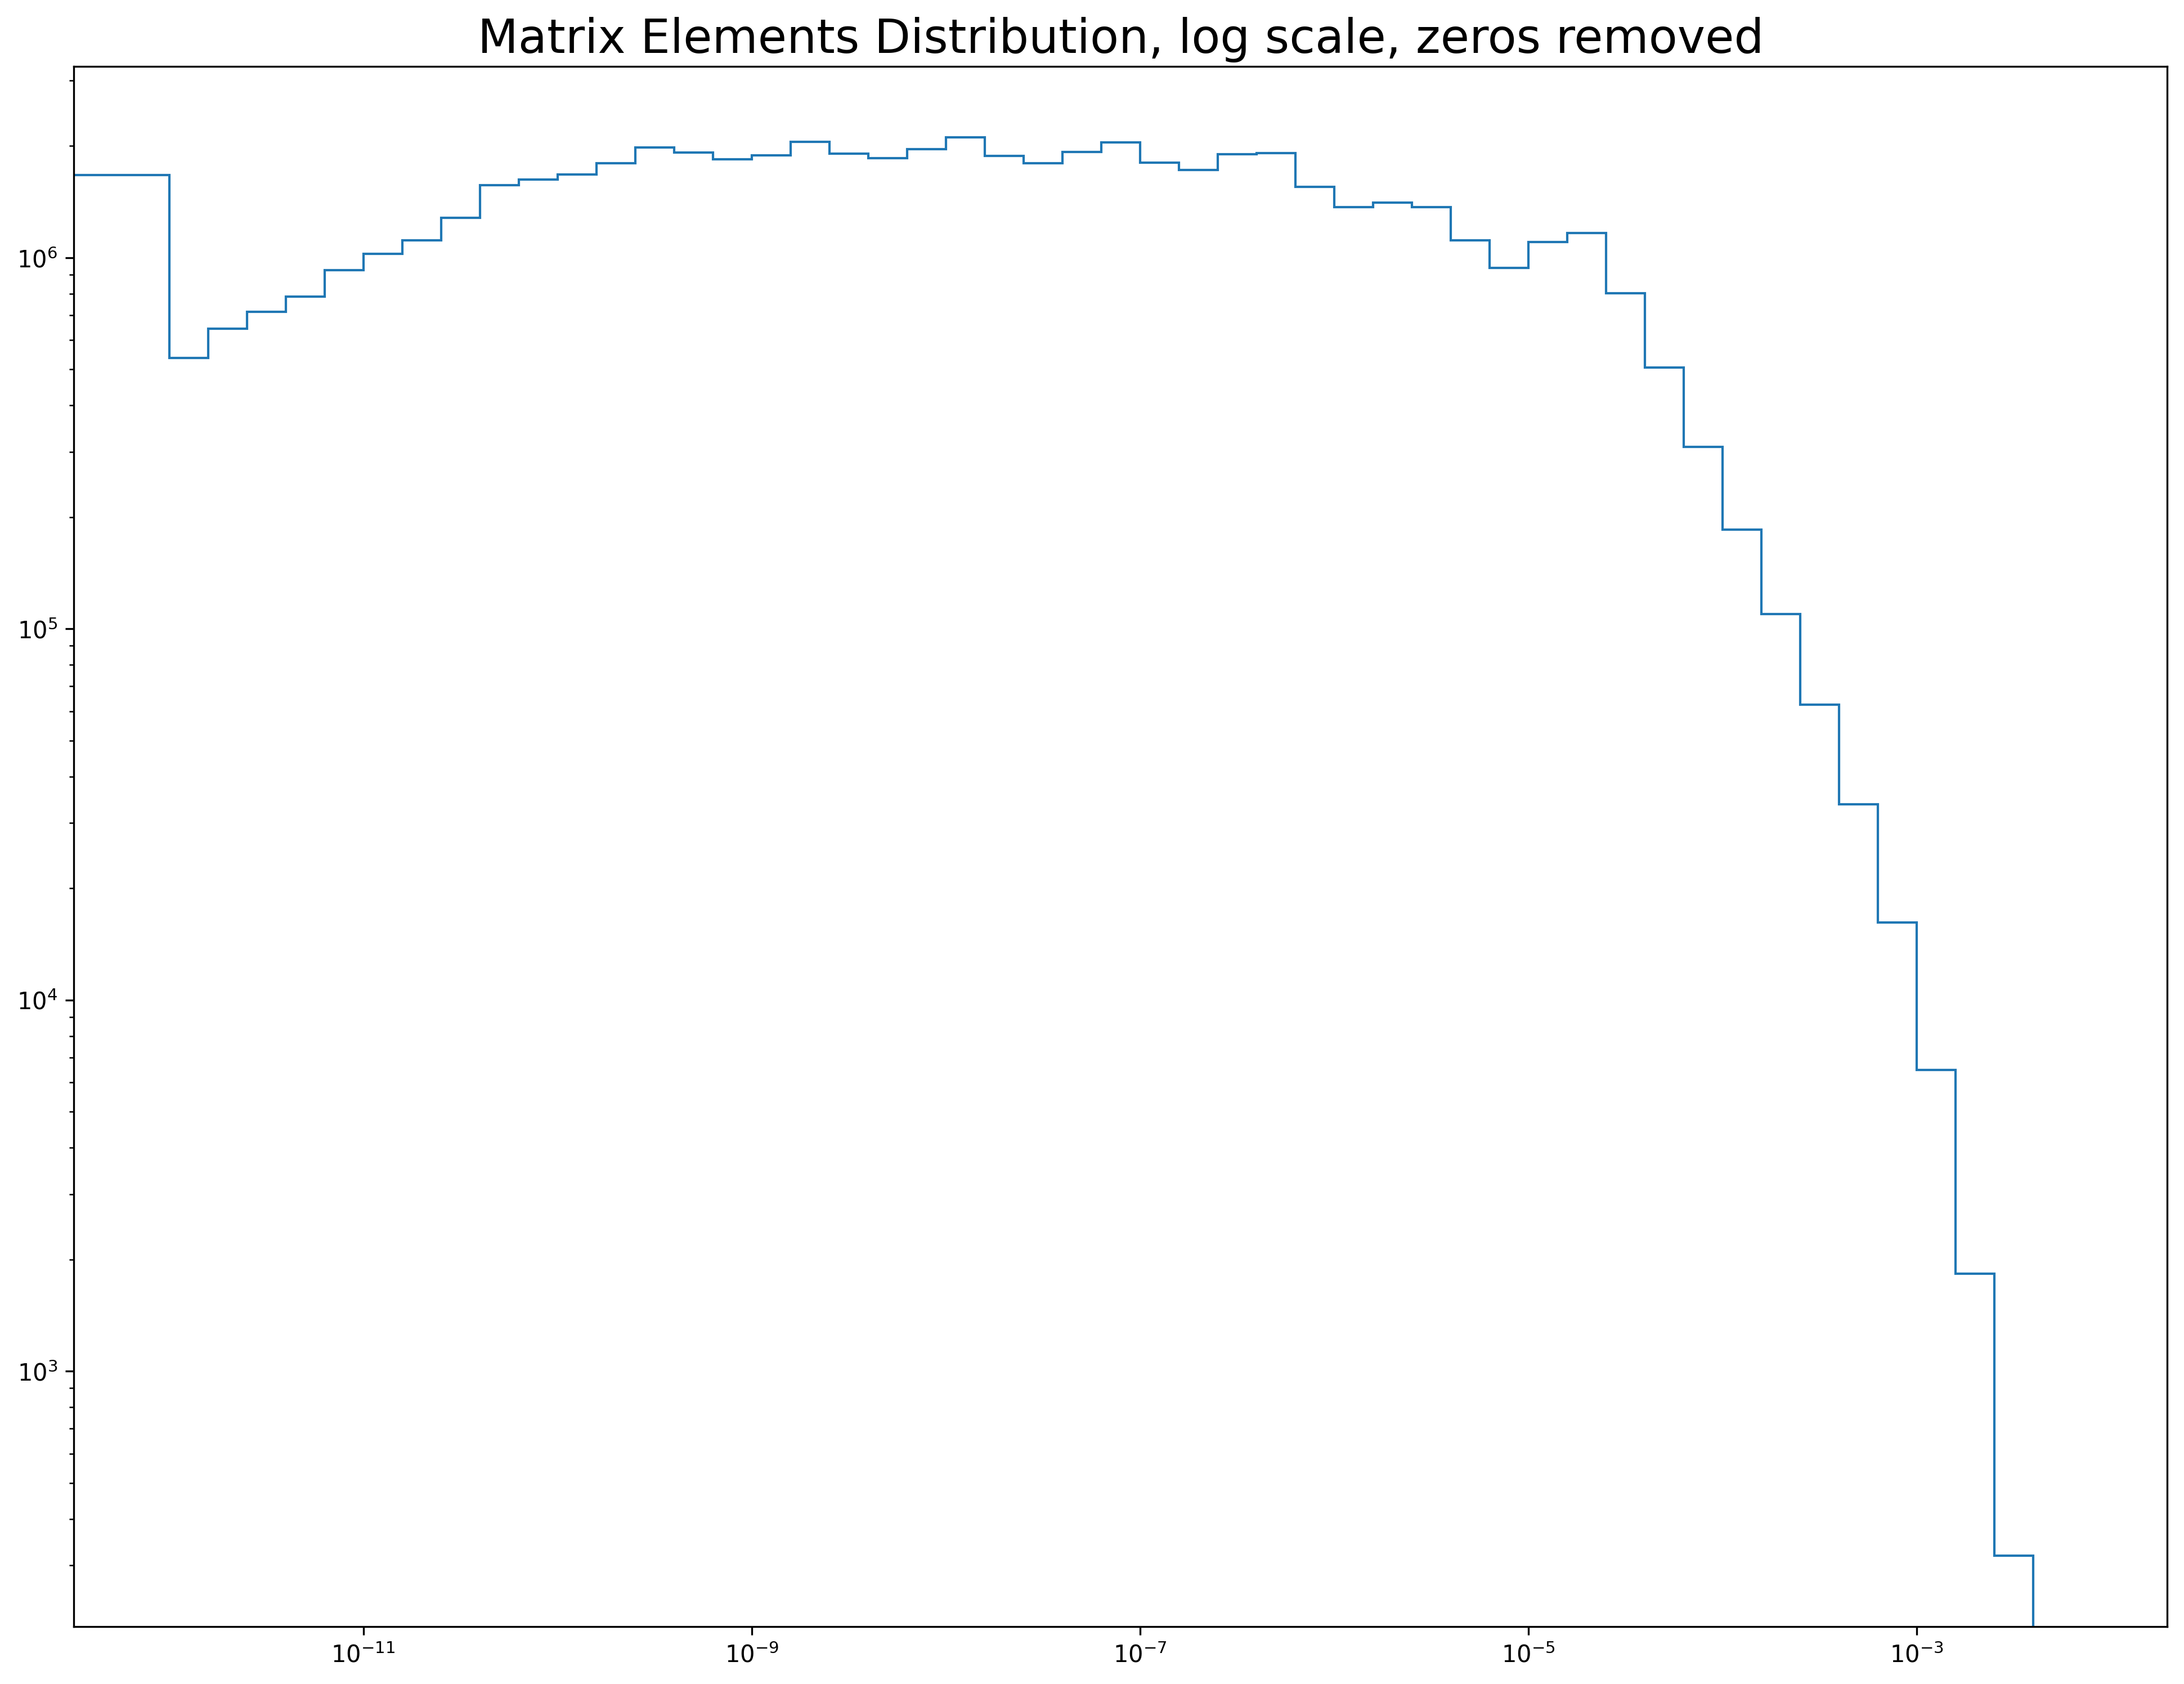

In [87]:
fig,ax = plt.subplots()
ax.stairs(hist,bins)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Matrix Elements Distribution, log scale, zeros removed",fontsize=20)
fig.savefig("distribution.png")

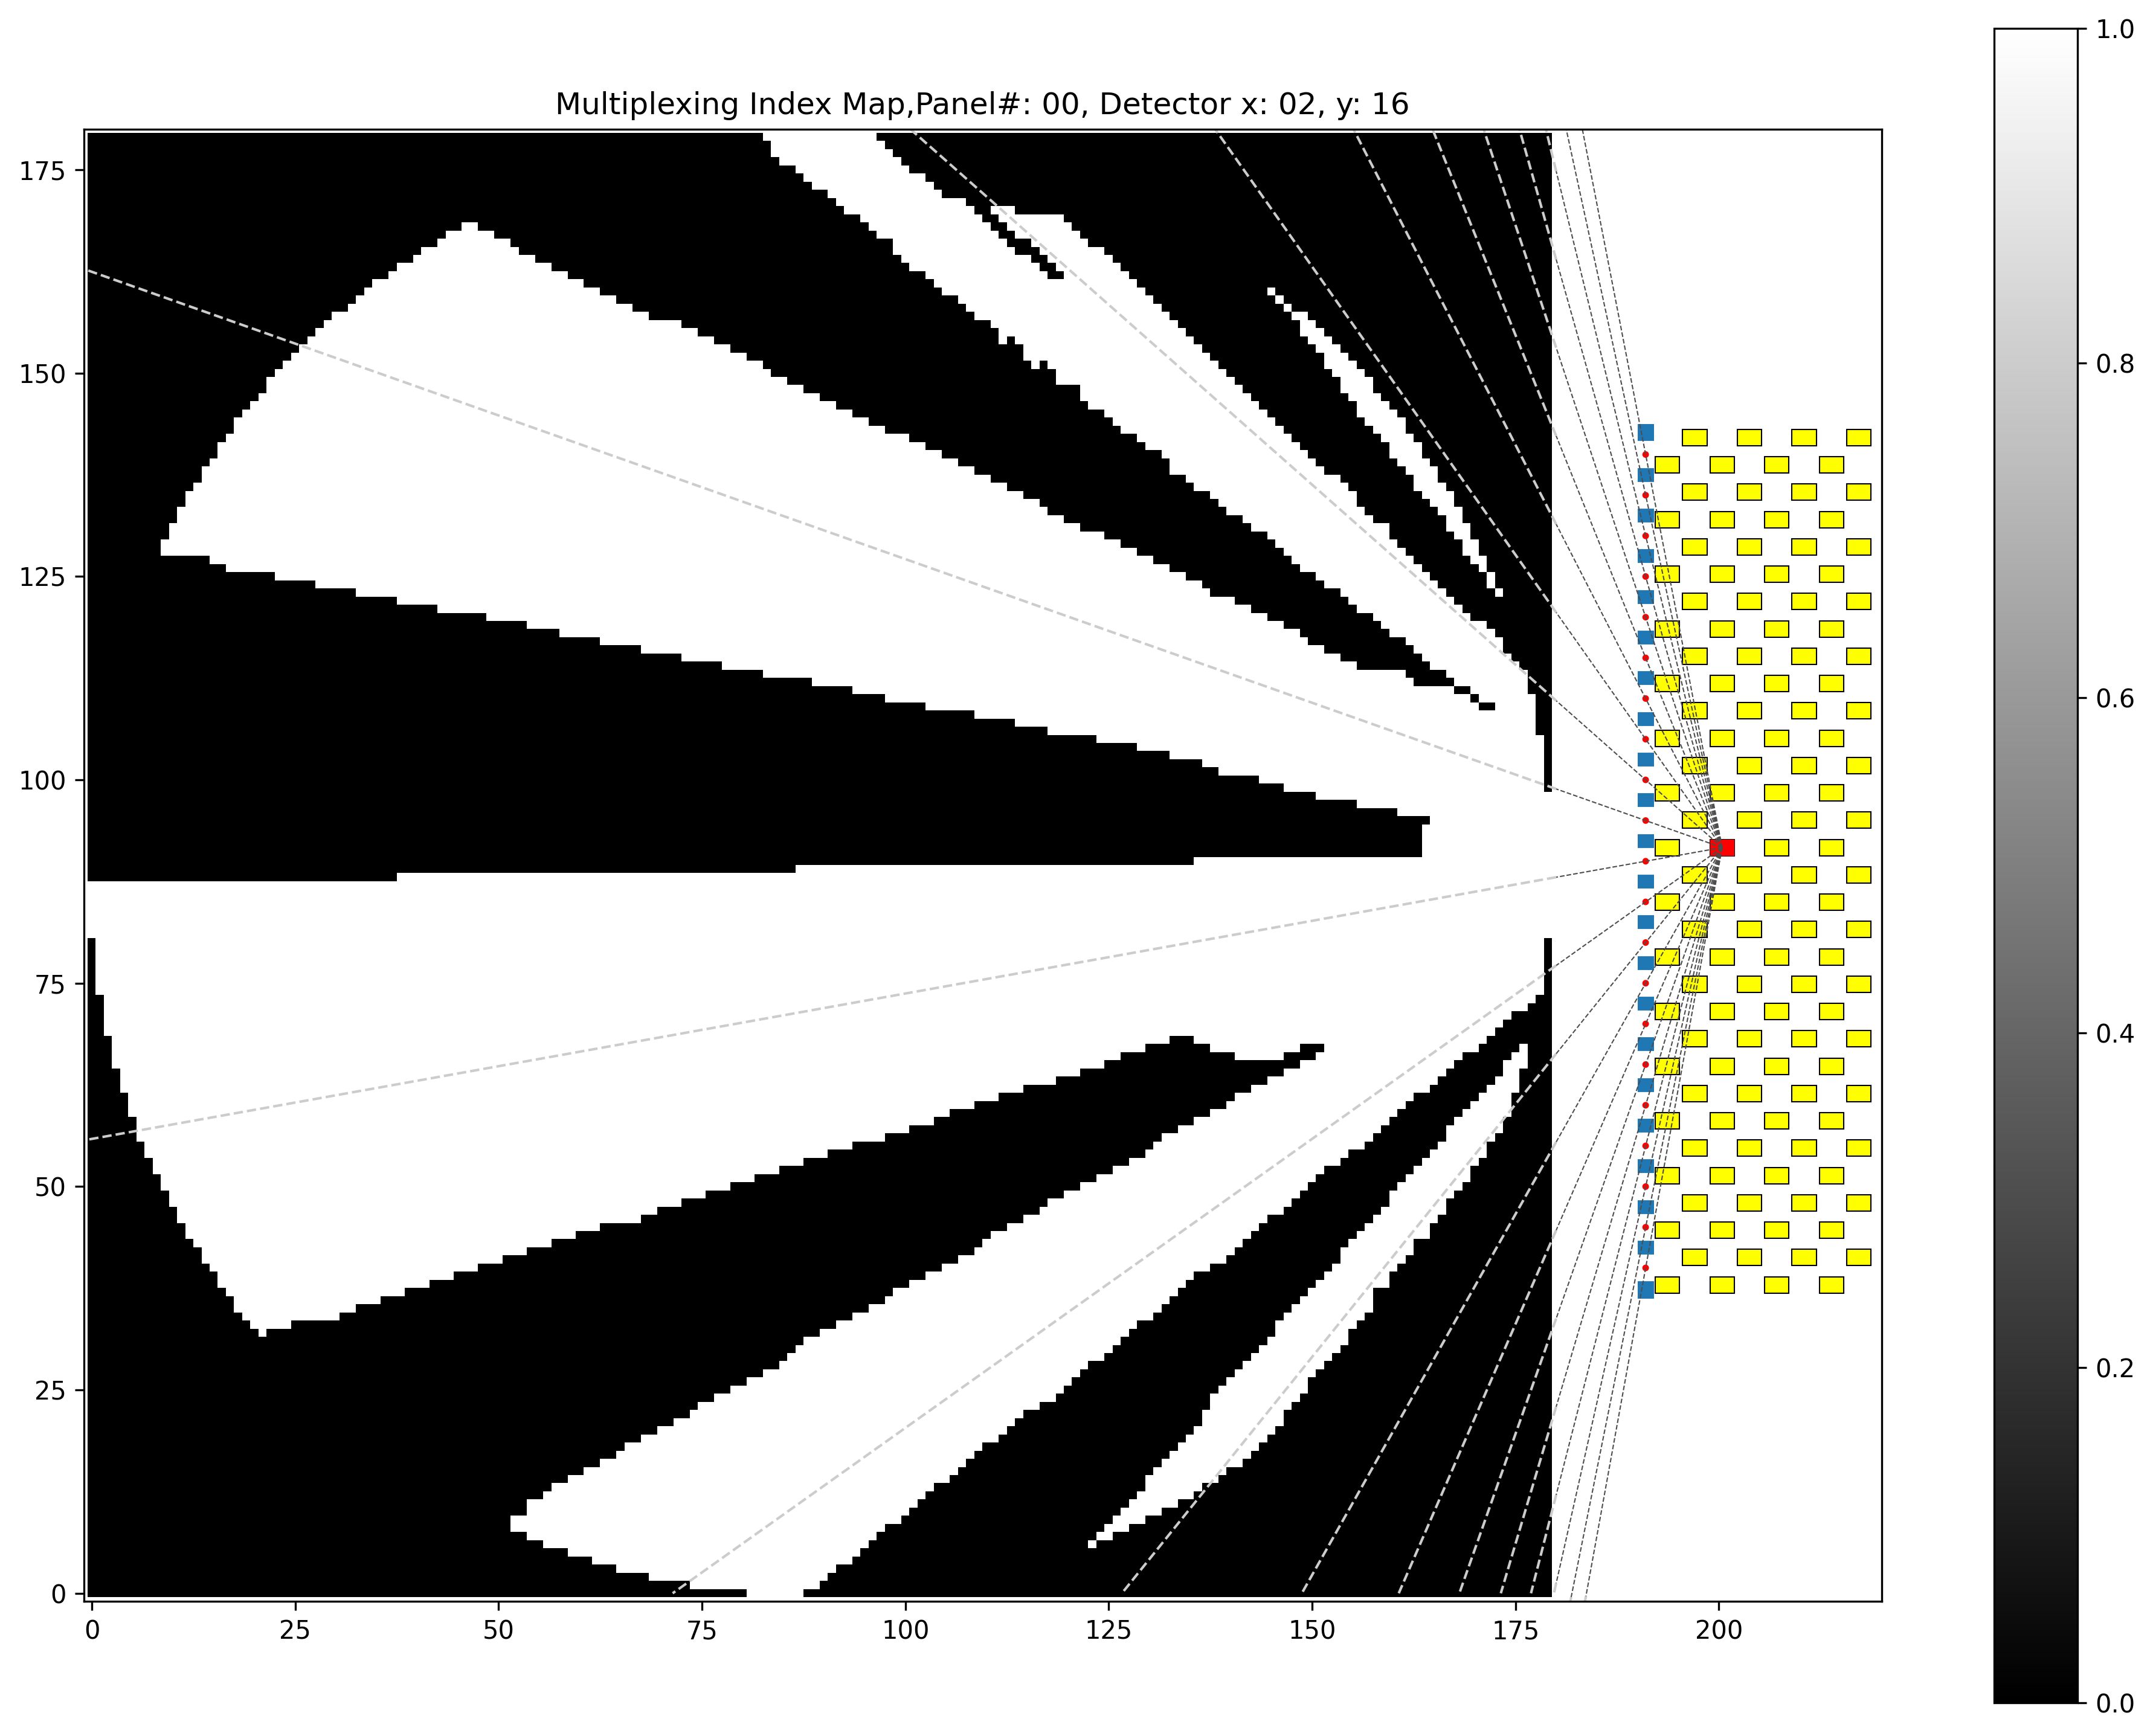

In [60]:
dIdxX=2
dIdxY=16
mpiImage = np.where(dataImage > 2e-6,1,0)
# dataImage=dataMatrix.reshape((NDetX_, NModule_, NDetY_, NImgX_, NImgY_))
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots()
imshow_obj=ax.imshow(mpiImage[dIdxX,0,dIdxY,:,:], cmap=matplotlib.colormaps.get_cmap('gray'),origin='lower')
pltTitle=ax.set_title('Multiplexing Index Map,Panel#: {:02d}, Detector x: {:02d}, y: {:02d}'.format(0, dIdxX, dIdxY))

ax.add_patch(patches.Rectangle((190,(180-107.52)*0.5),plate_thick,107.52))
for ele in np.column_stack((aperture_x, aperture_y)):
    x = ele[0]-plate_thick*0.5
    y = ele[1]-aperture_width*0.5
    ax.add_patch(patches.Rectangle((x, y), plate_thick, aperture_width, color='white'))
    ax.add_patch(patches.Circle((ele[0],ele[1]), radius=0.25, color='red'))   
detIdx=0
for xlayerIdx in range(0,8):
    for ele in np.column_stack((detector_x[xlayerIdx], detector_y)):
        x = ele[0]-3.0*0.5
        y = ele[1]-2.0*0.5
        if (detIdx%2) == 0 :
            ax.add_patch(patches.Rectangle((x, y), 3.0, 2.0, facecolor='yellow',linewidth=0.5,edgecolor='black'))
        detIdx = detIdx + 1
    detIdx = detIdx + 1
for i in range (0,21):
    centerline_k = (detector_y[dIdxY]-aperture_y[i])/(detector_x[dIdxX,dIdxY]-aperture_x[i])
    centerline_b = aperture_y[i] - centerline_k*aperture_x[i]
    x1=[detector_x[dIdxX,dIdxY]]
    y1=[detector_y[dIdxY]]
    x1.append(180)
    y1.append(180*centerline_k+centerline_b)
    x2 = [180]
    y2 = [180*centerline_k+centerline_b]
    if centerline_k > 0 :
        y2.append(0)
        x2.append((0-centerline_b)/centerline_k)
    else:
        y2.append(180)
        x2.append((180-centerline_b)/centerline_k)
    ax.plot(x1,y1,linestyle='--',linewidth=0.5,color='0.3')
    ax.plot(x2,y2,linestyle='--',linewidth=1,color='0.8')
ax.set_ylim(-1,180)
ax.set_xlim(-1,220)
ax.add_patch(patches.Rectangle((detector_x[dIdxX,dIdxY]-3.0*0.5,detector_y[dIdxY]-2.0*0.5),3.0,2.0,facecolor = 'red'))
plt.colorbar(imshow_obj)

In [90]:
front4Layers=dataImage[:4,:,:,:,:]
front8Layers=dataImage[:8,:,:,:,:]
# print(front4Layers.shape)
# hist, bins=np.histogram(dataImage[np.nonzero(dataImage)],bins=mybins)

# mpiImage = np.where(dataImage > 2e-6,1,0)

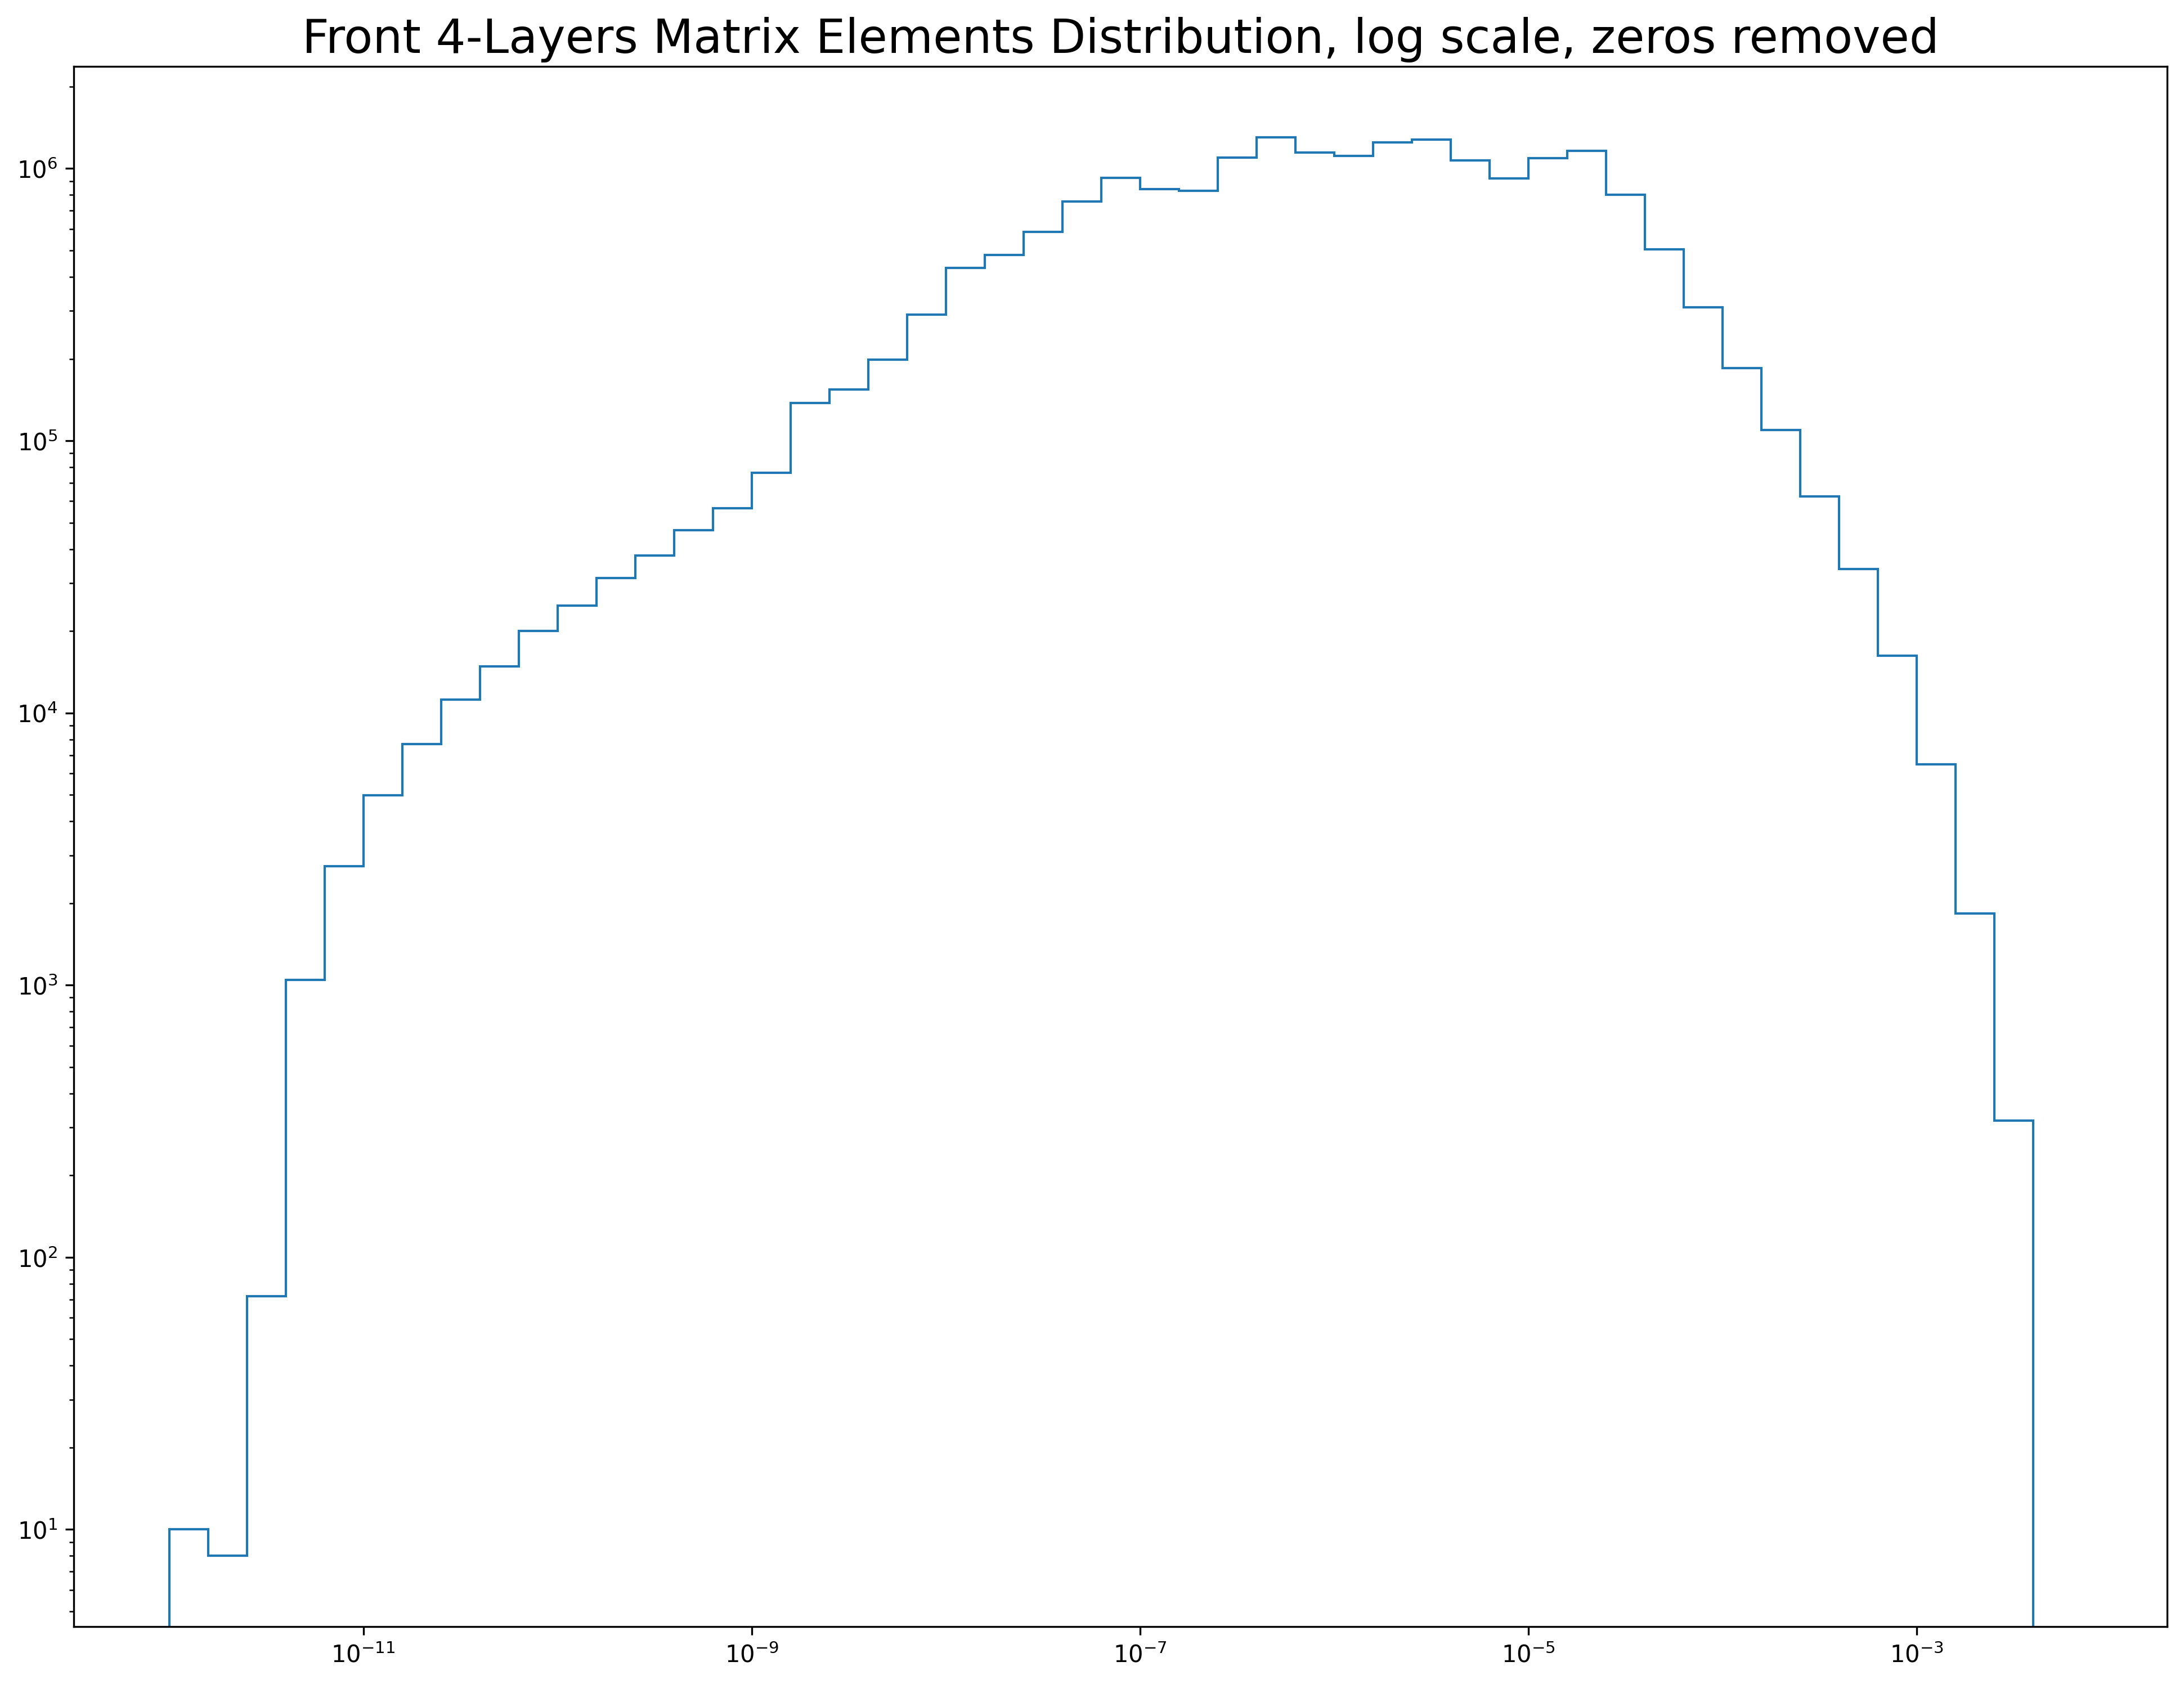

In [92]:
hist4, bins=np.histogram(front4Layers[np.nonzero(front4Layers)],bins=mybins)
fig,ax = plt.subplots()
ax.stairs(hist,bins)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Front 4-Layers Matrix Elements Distribution, log scale, zeros removed",fontsize=20)
fig.savefig("Front 4-Layers Distribution.png")

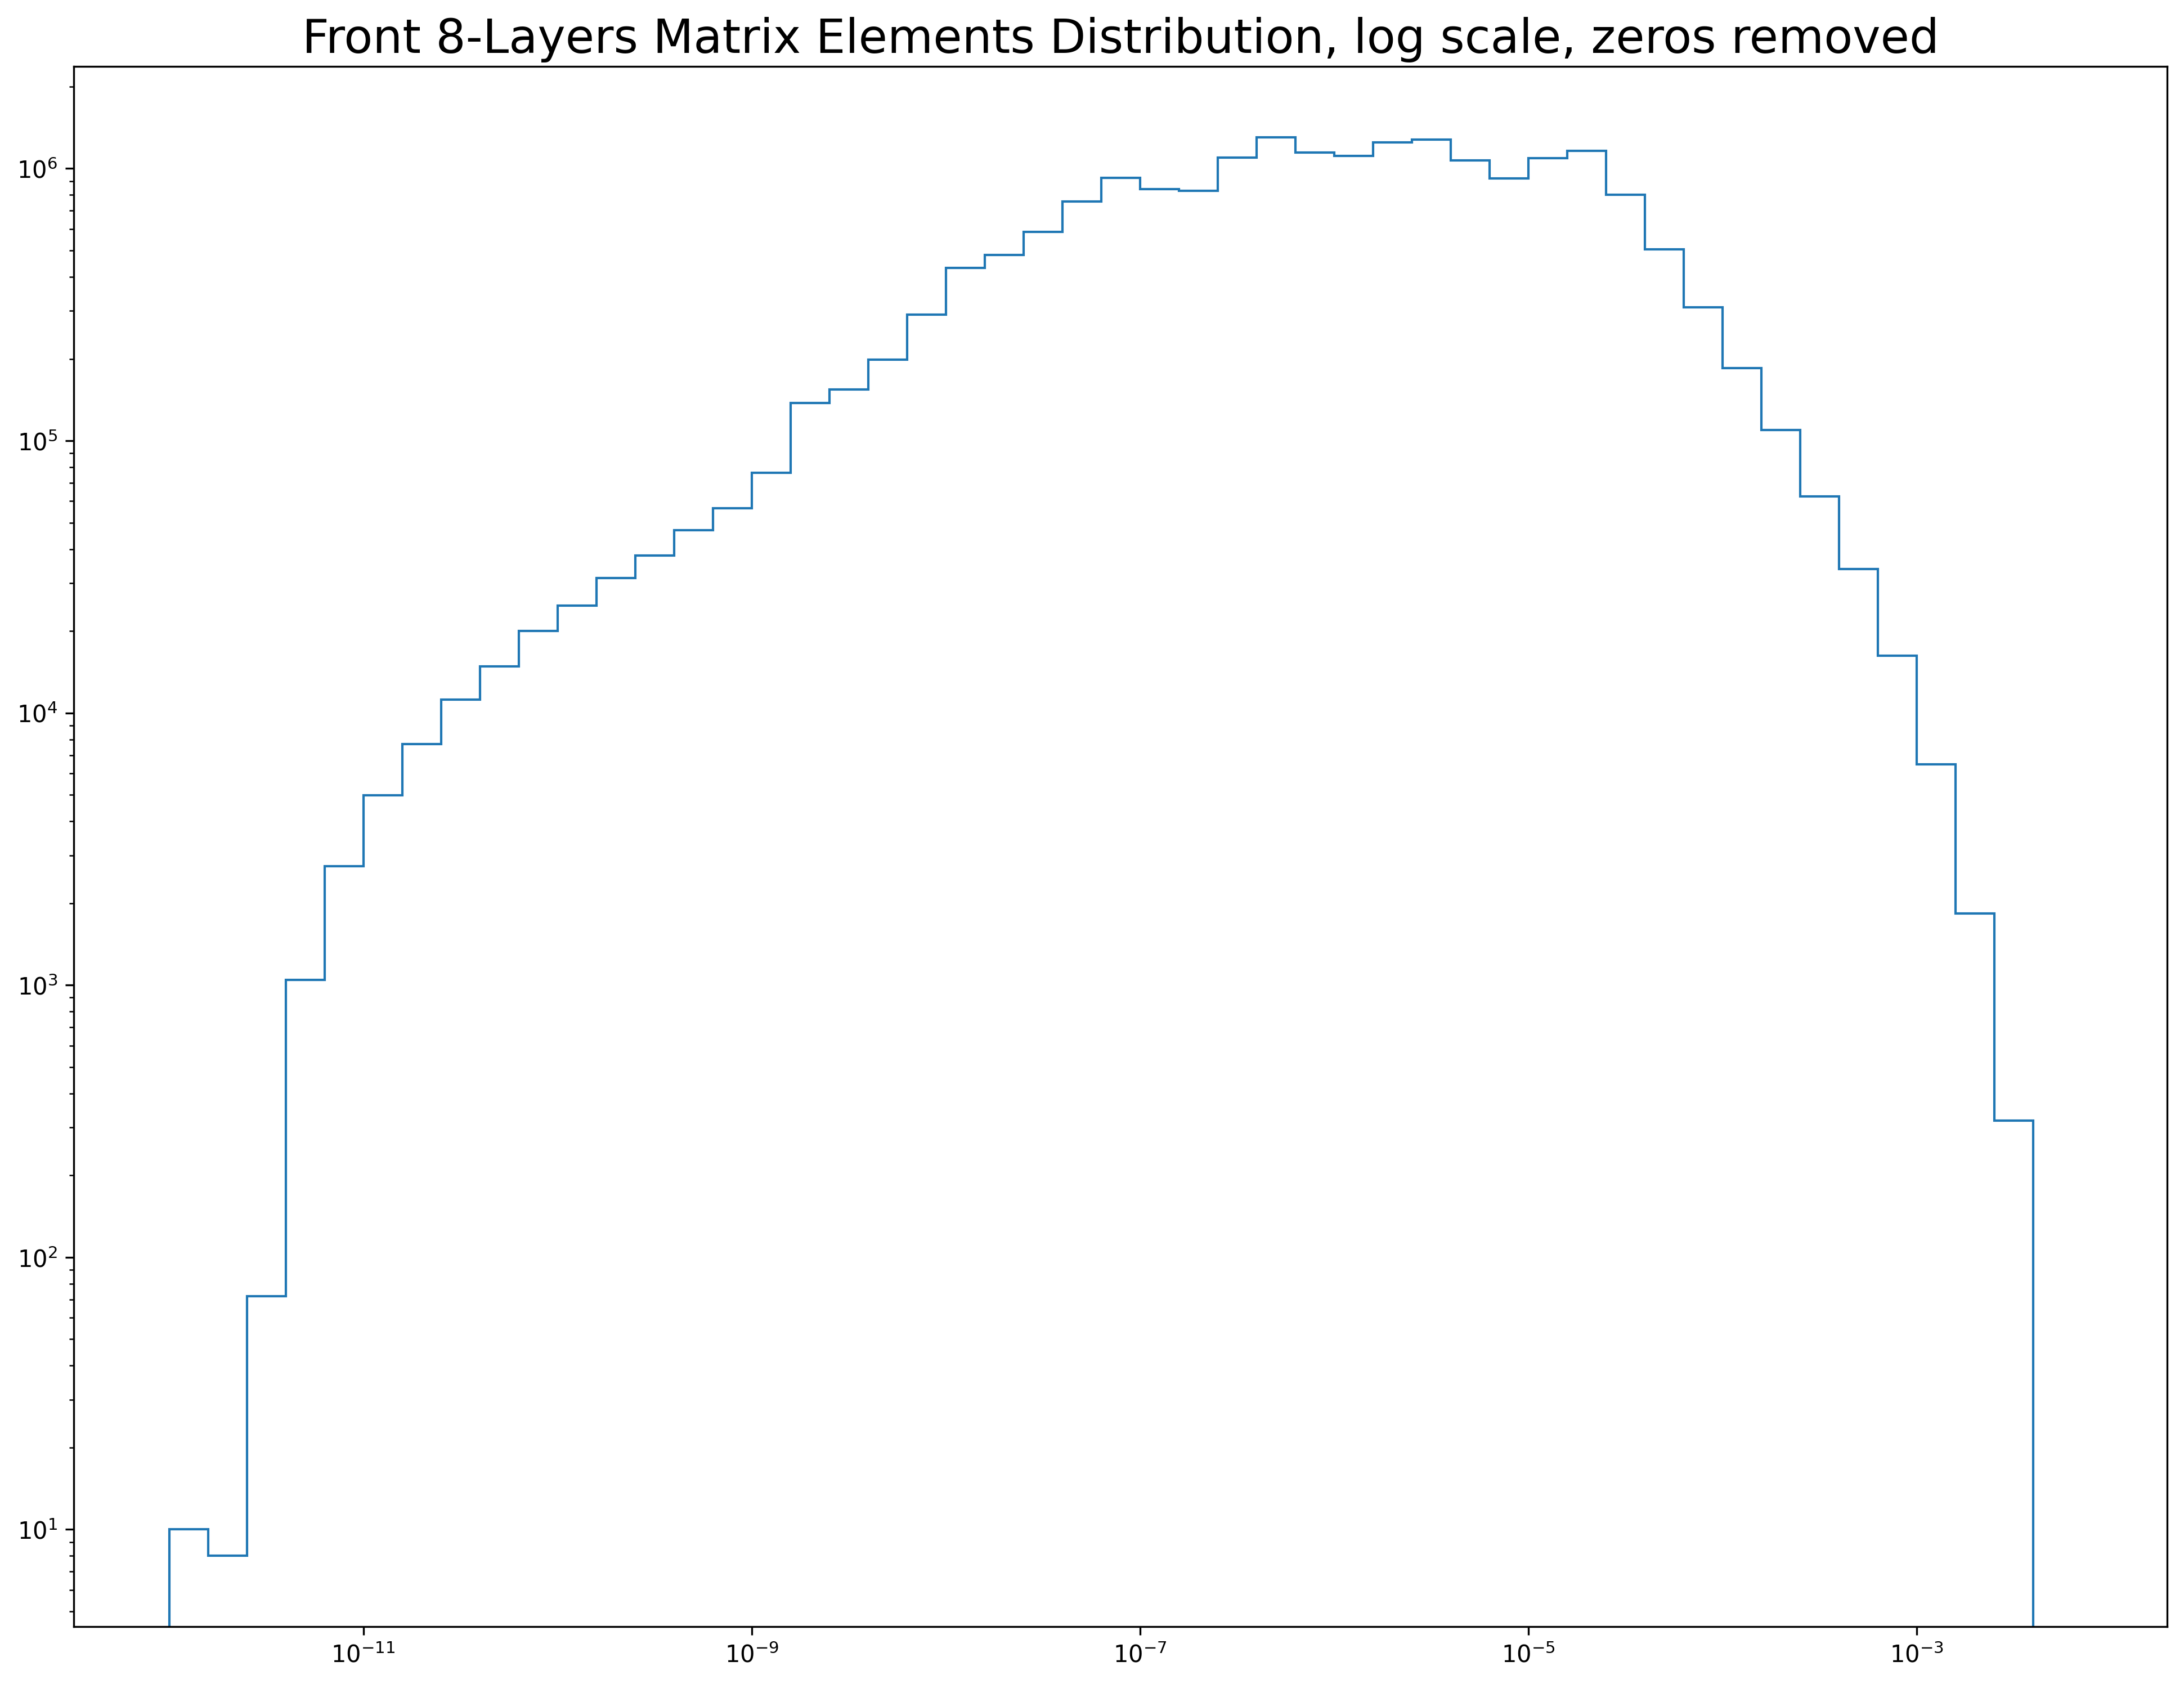

In [93]:
hist8, bins=np.histogram(front8Layers[np.nonzero(front8Layers)],bins=mybins)
fig,ax = plt.subplots()
ax.stairs(hist8,bins)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Front 8-Layers Matrix Elements Distribution, log scale, zeros removed",fontsize=20)
fig.savefig("Front 8-Layers Distribution.png")

In [95]:
mpiImage4 = np.where(front4Layers > 2e-6,1.0,0.0)
mpiImage8 = np.where(front8Layers > 2e-6,1.0,0.0)

In [97]:
print(mpiImage4.shape)
print(mpiImage8.shape)

(4, 6, 32, 180, 180)
(8, 6, 32, 180, 180)


In [141]:
mpiImage4_2d=np.sum(mpiImage4,axis=(0,1,2))/384
mpiImage8_2d=np.sum(mpiImage8,axis=(0,1,2))/768
# mpiImage4_2d_thresholded=np.where(mpiImage4_2d)

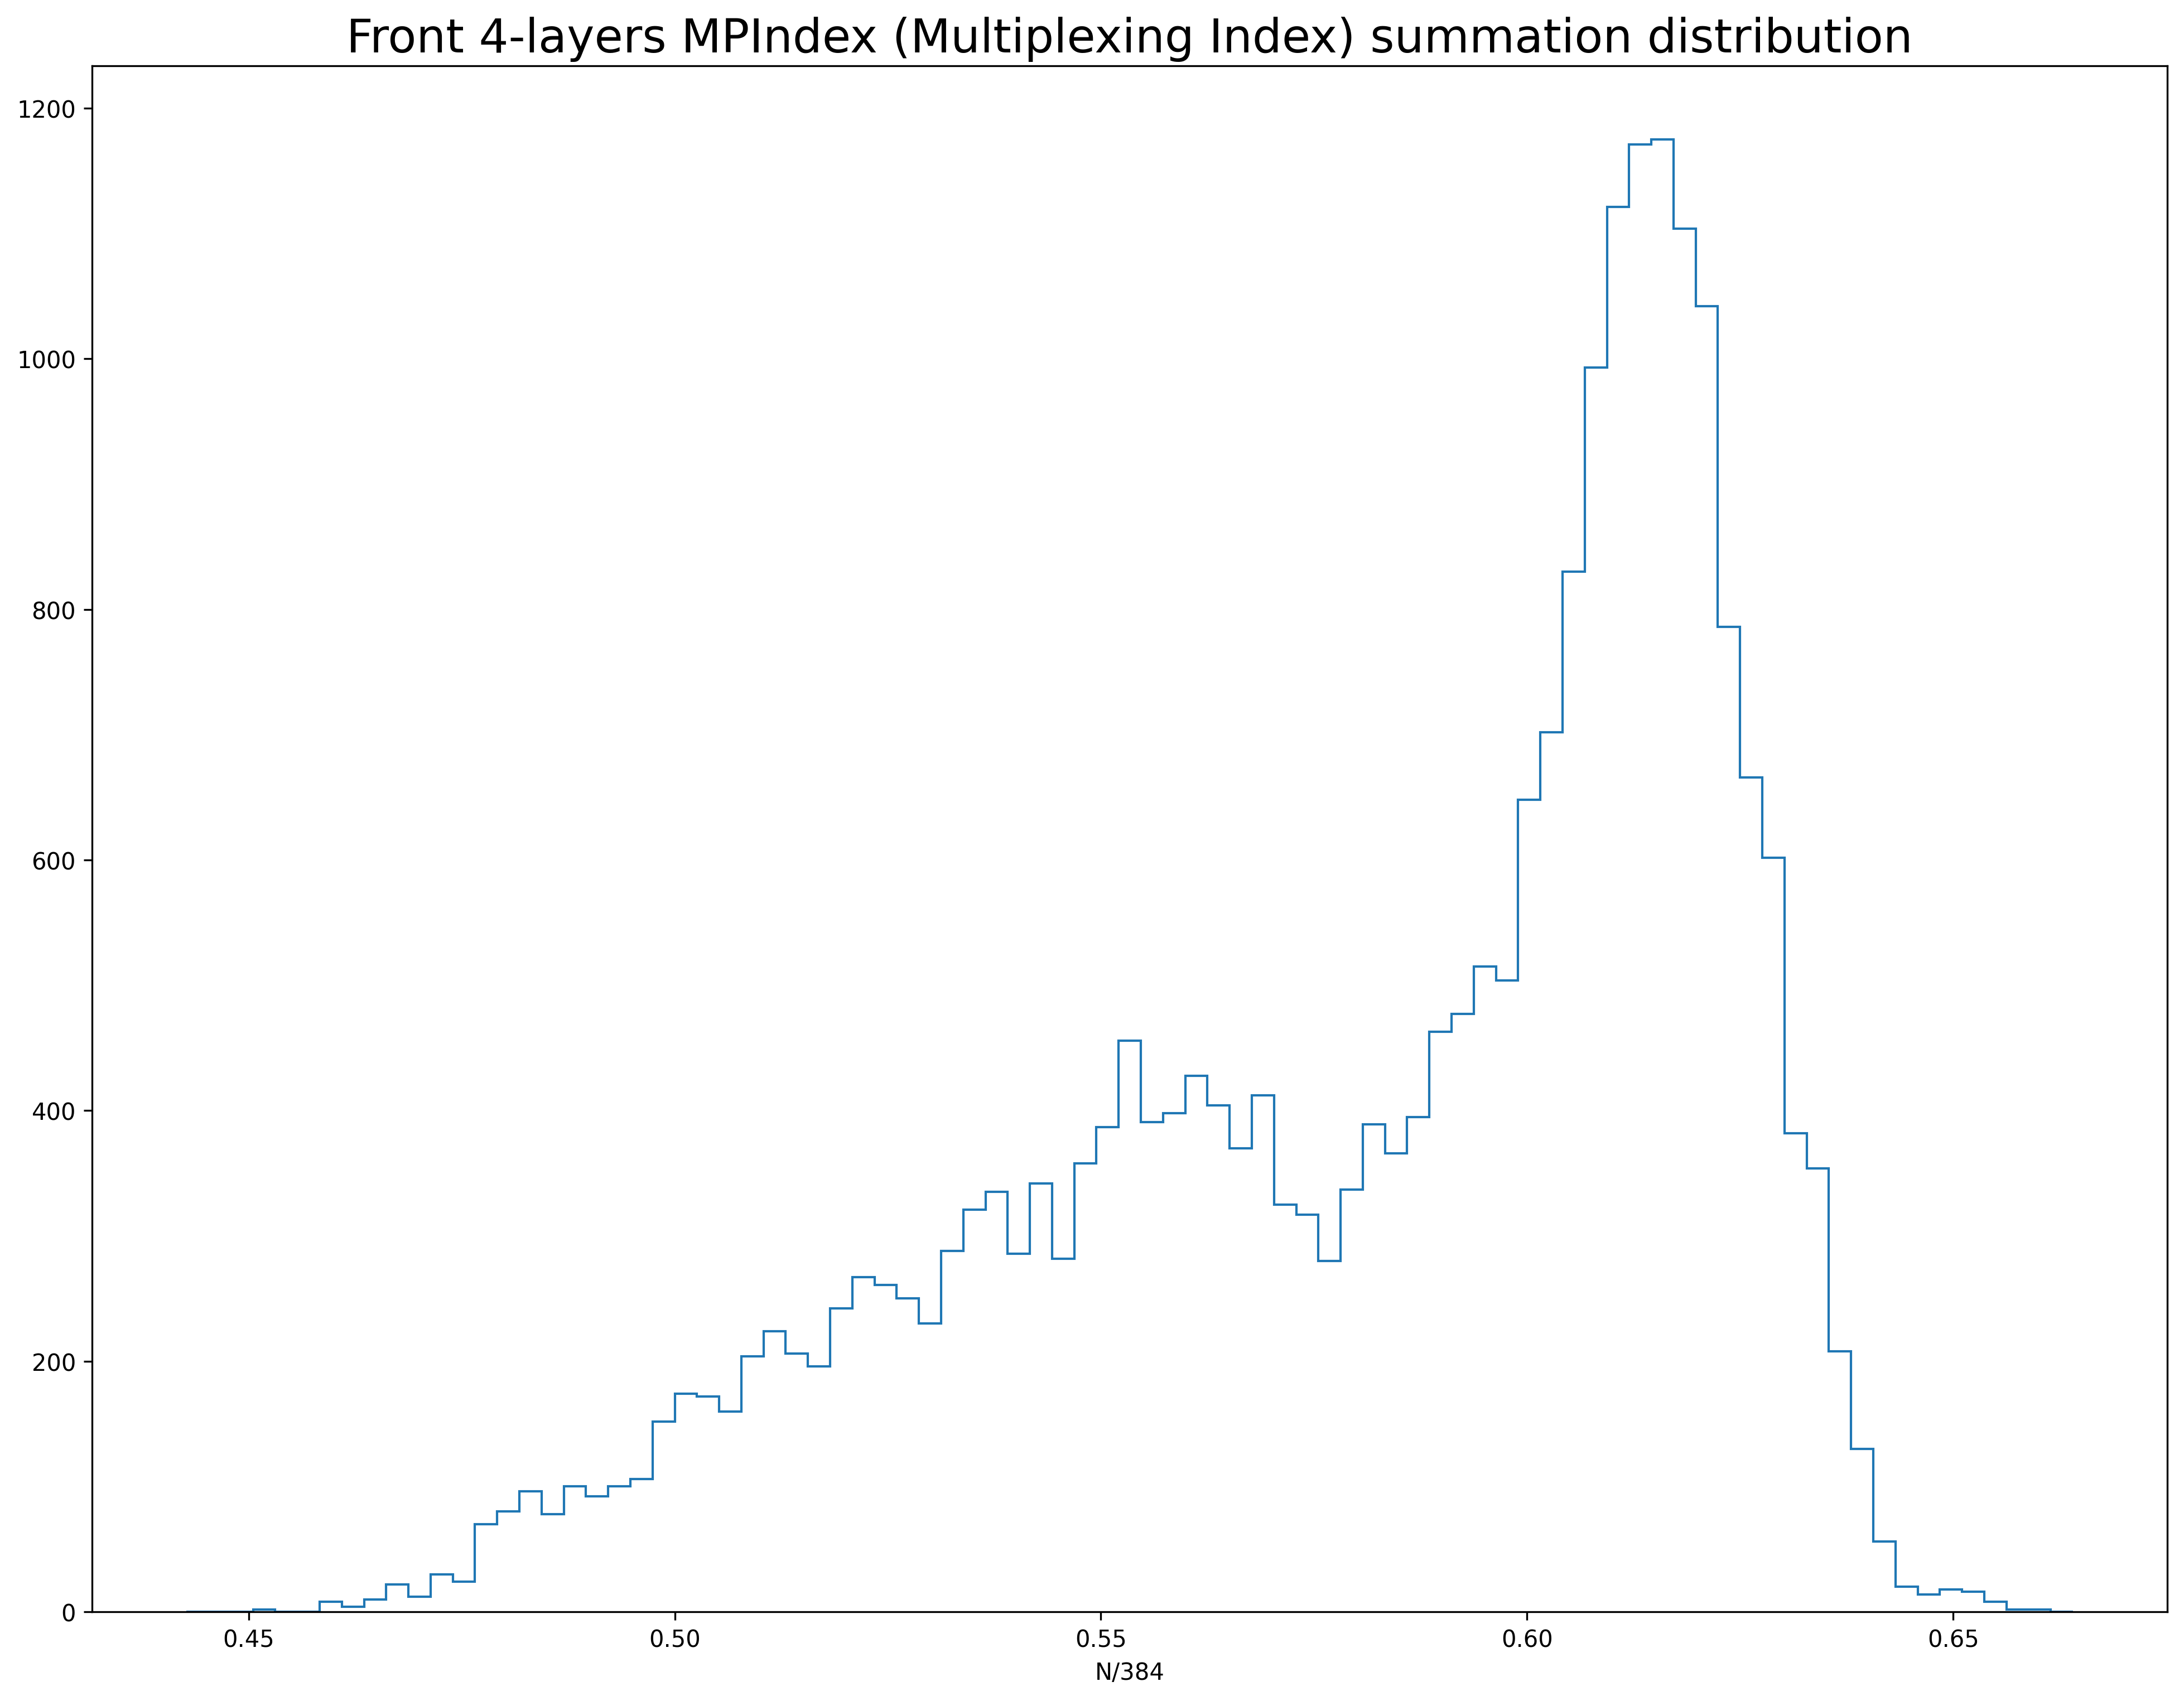

In [148]:
hist_4layer_mpi_sum, bins=np.histogram(mpiImage4_2d[np.nonzero(mpiImage4_2d)],bins=np.arange(170/384,255/384,1/384))
fig,ax = plt.subplots()
ax.stairs(hist_4layer_mpi_sum,bins)
# ax.set_yscale("log")
# ax.set_xscale("log")
ax.set_xlabel("N/384")
ax.set_title("Front 4-layers MPIndex (Multiplexing Index) summation distribution",fontsize=20)
fig.savefig("Front 4-layers MPIndex summation distribution.png")

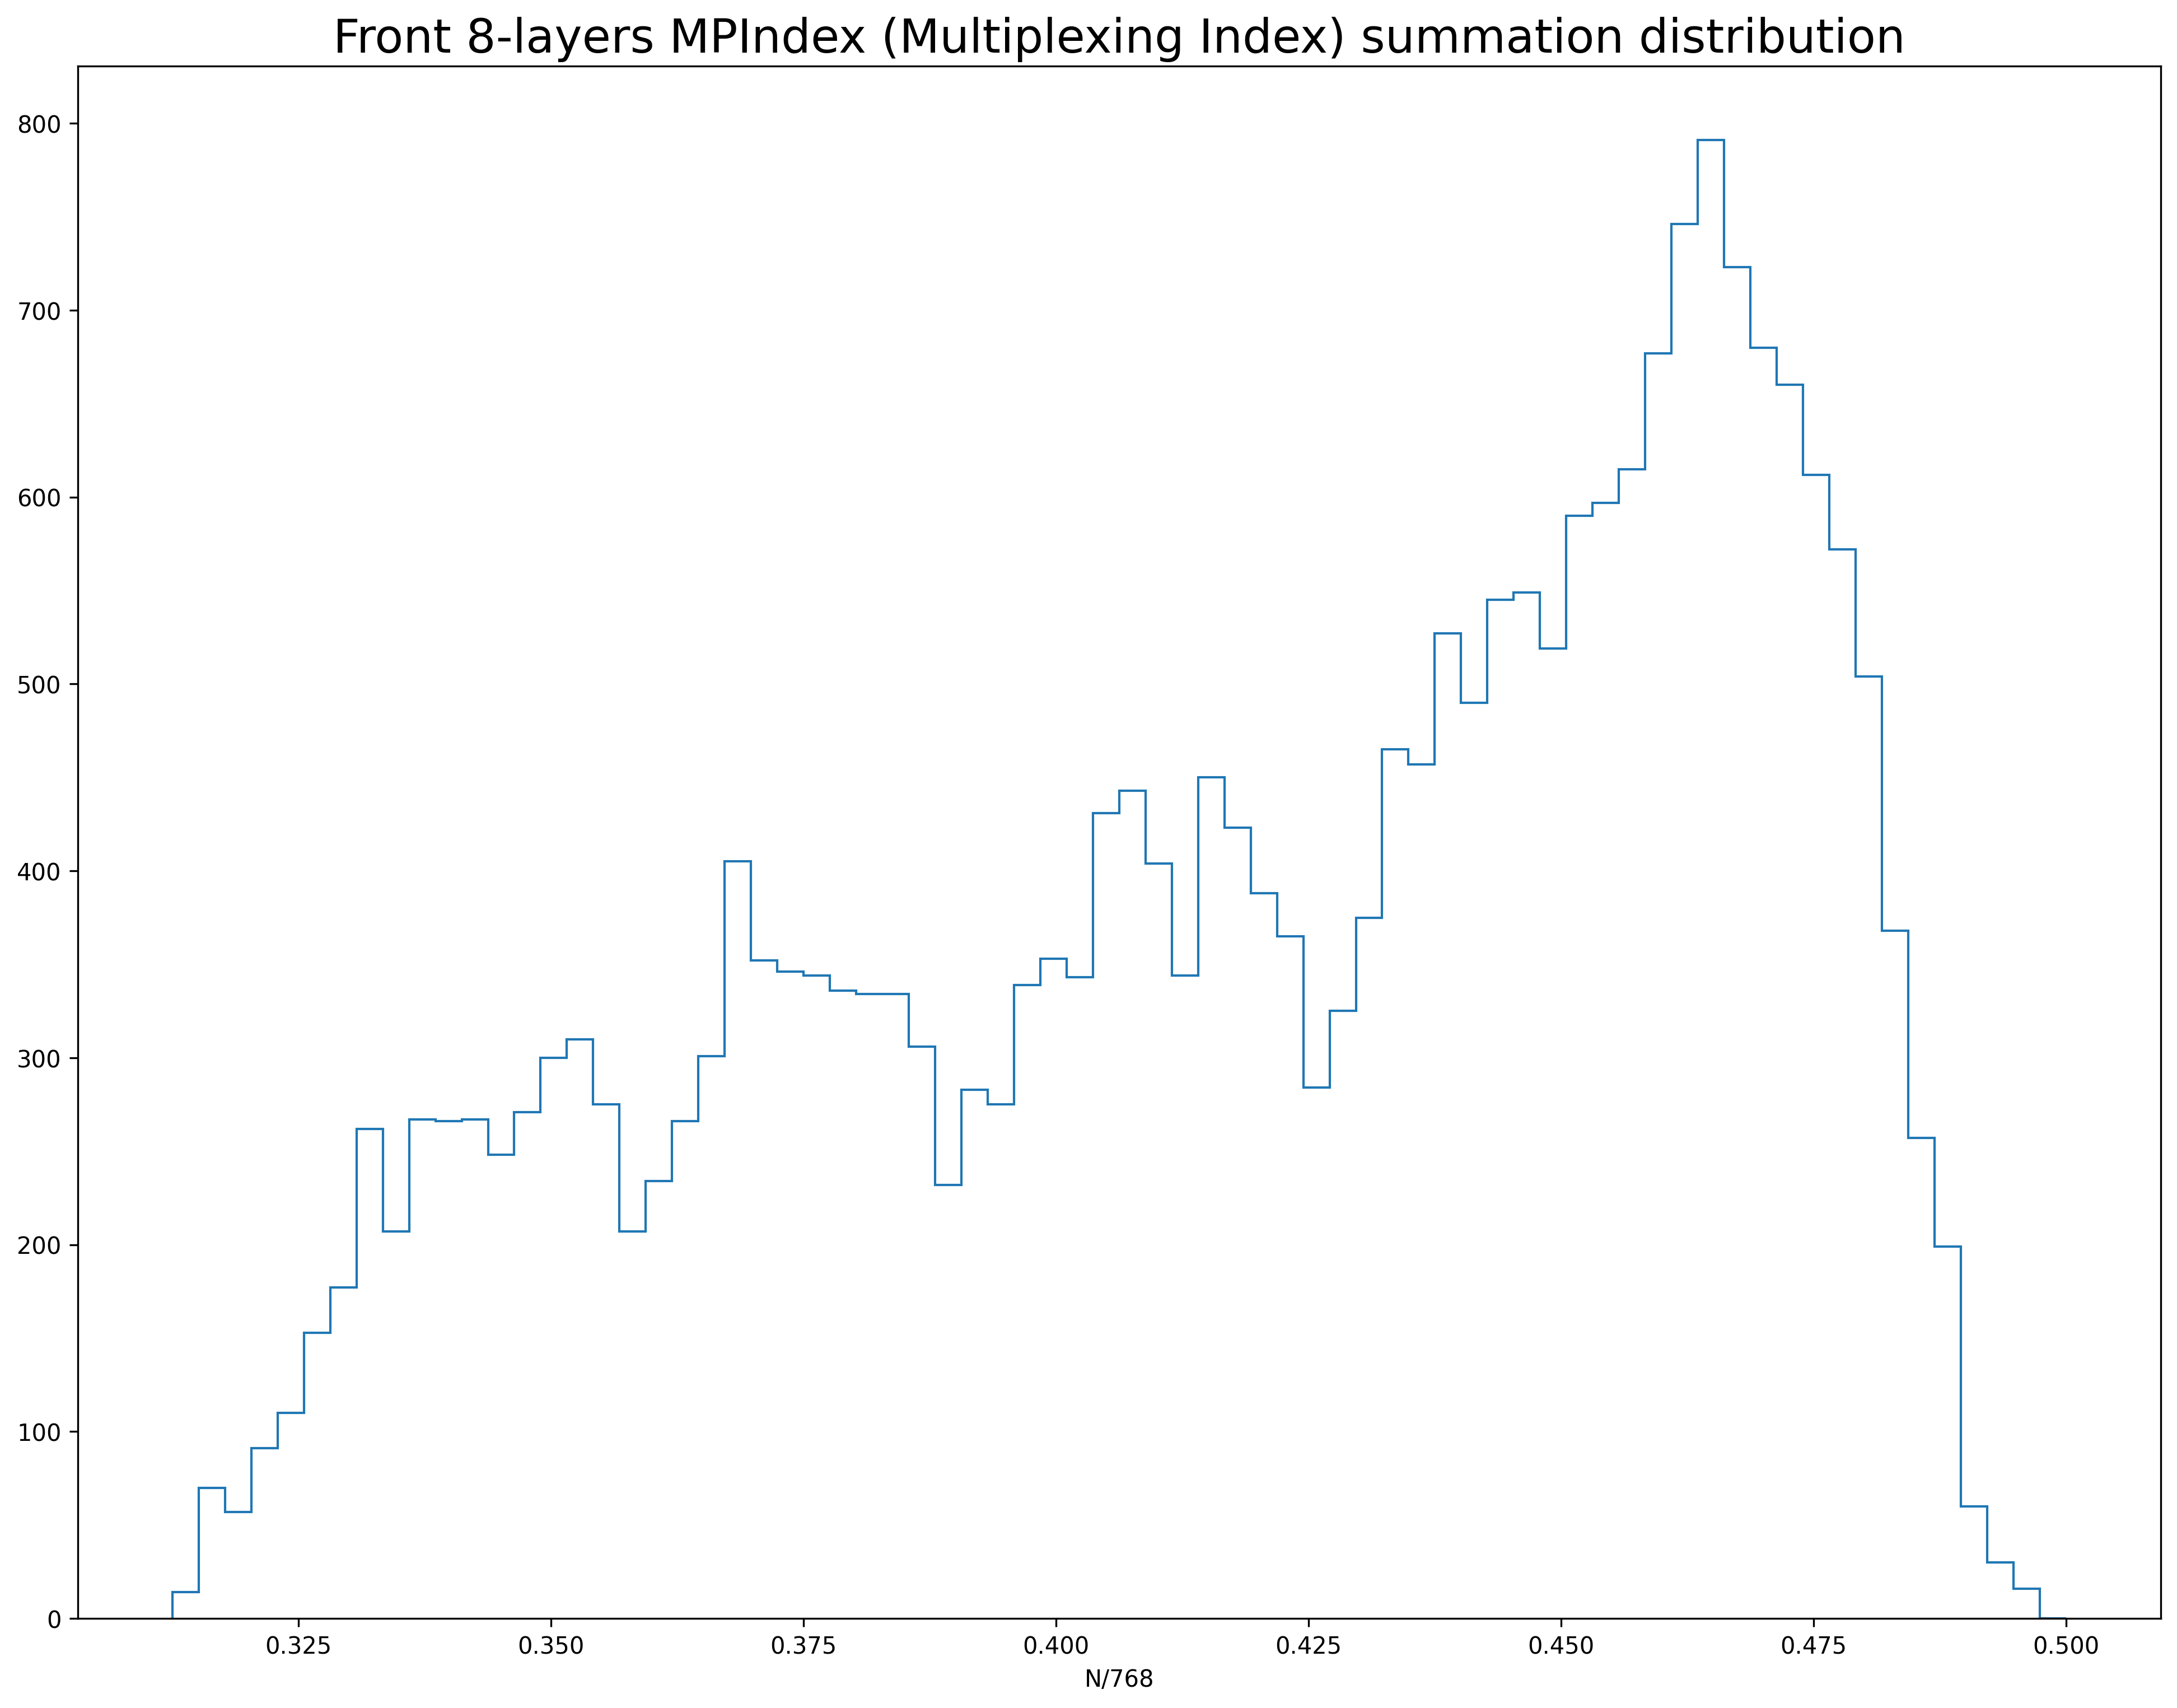

In [150]:
#np.arange(170,255)
hist_8layer_mpi_sum, bins=np.histogram(mpiImage8_2d[np.nonzero(mpiImage8_2d)],bins=np.arange(240/768,385/768,2/768))
fig,ax = plt.subplots()
ax.stairs(hist_8layer_mpi_sum,bins)
# ax.set_yscale("log")
# ax.set_xscale("log")
ax.set_title("Front 8-layers MPIndex (Multiplexing Index) summation distribution",fontsize=20)
ax.set_xlabel("N/768")
fig.savefig("Front 8-layers MPIndex summation distribution.png")

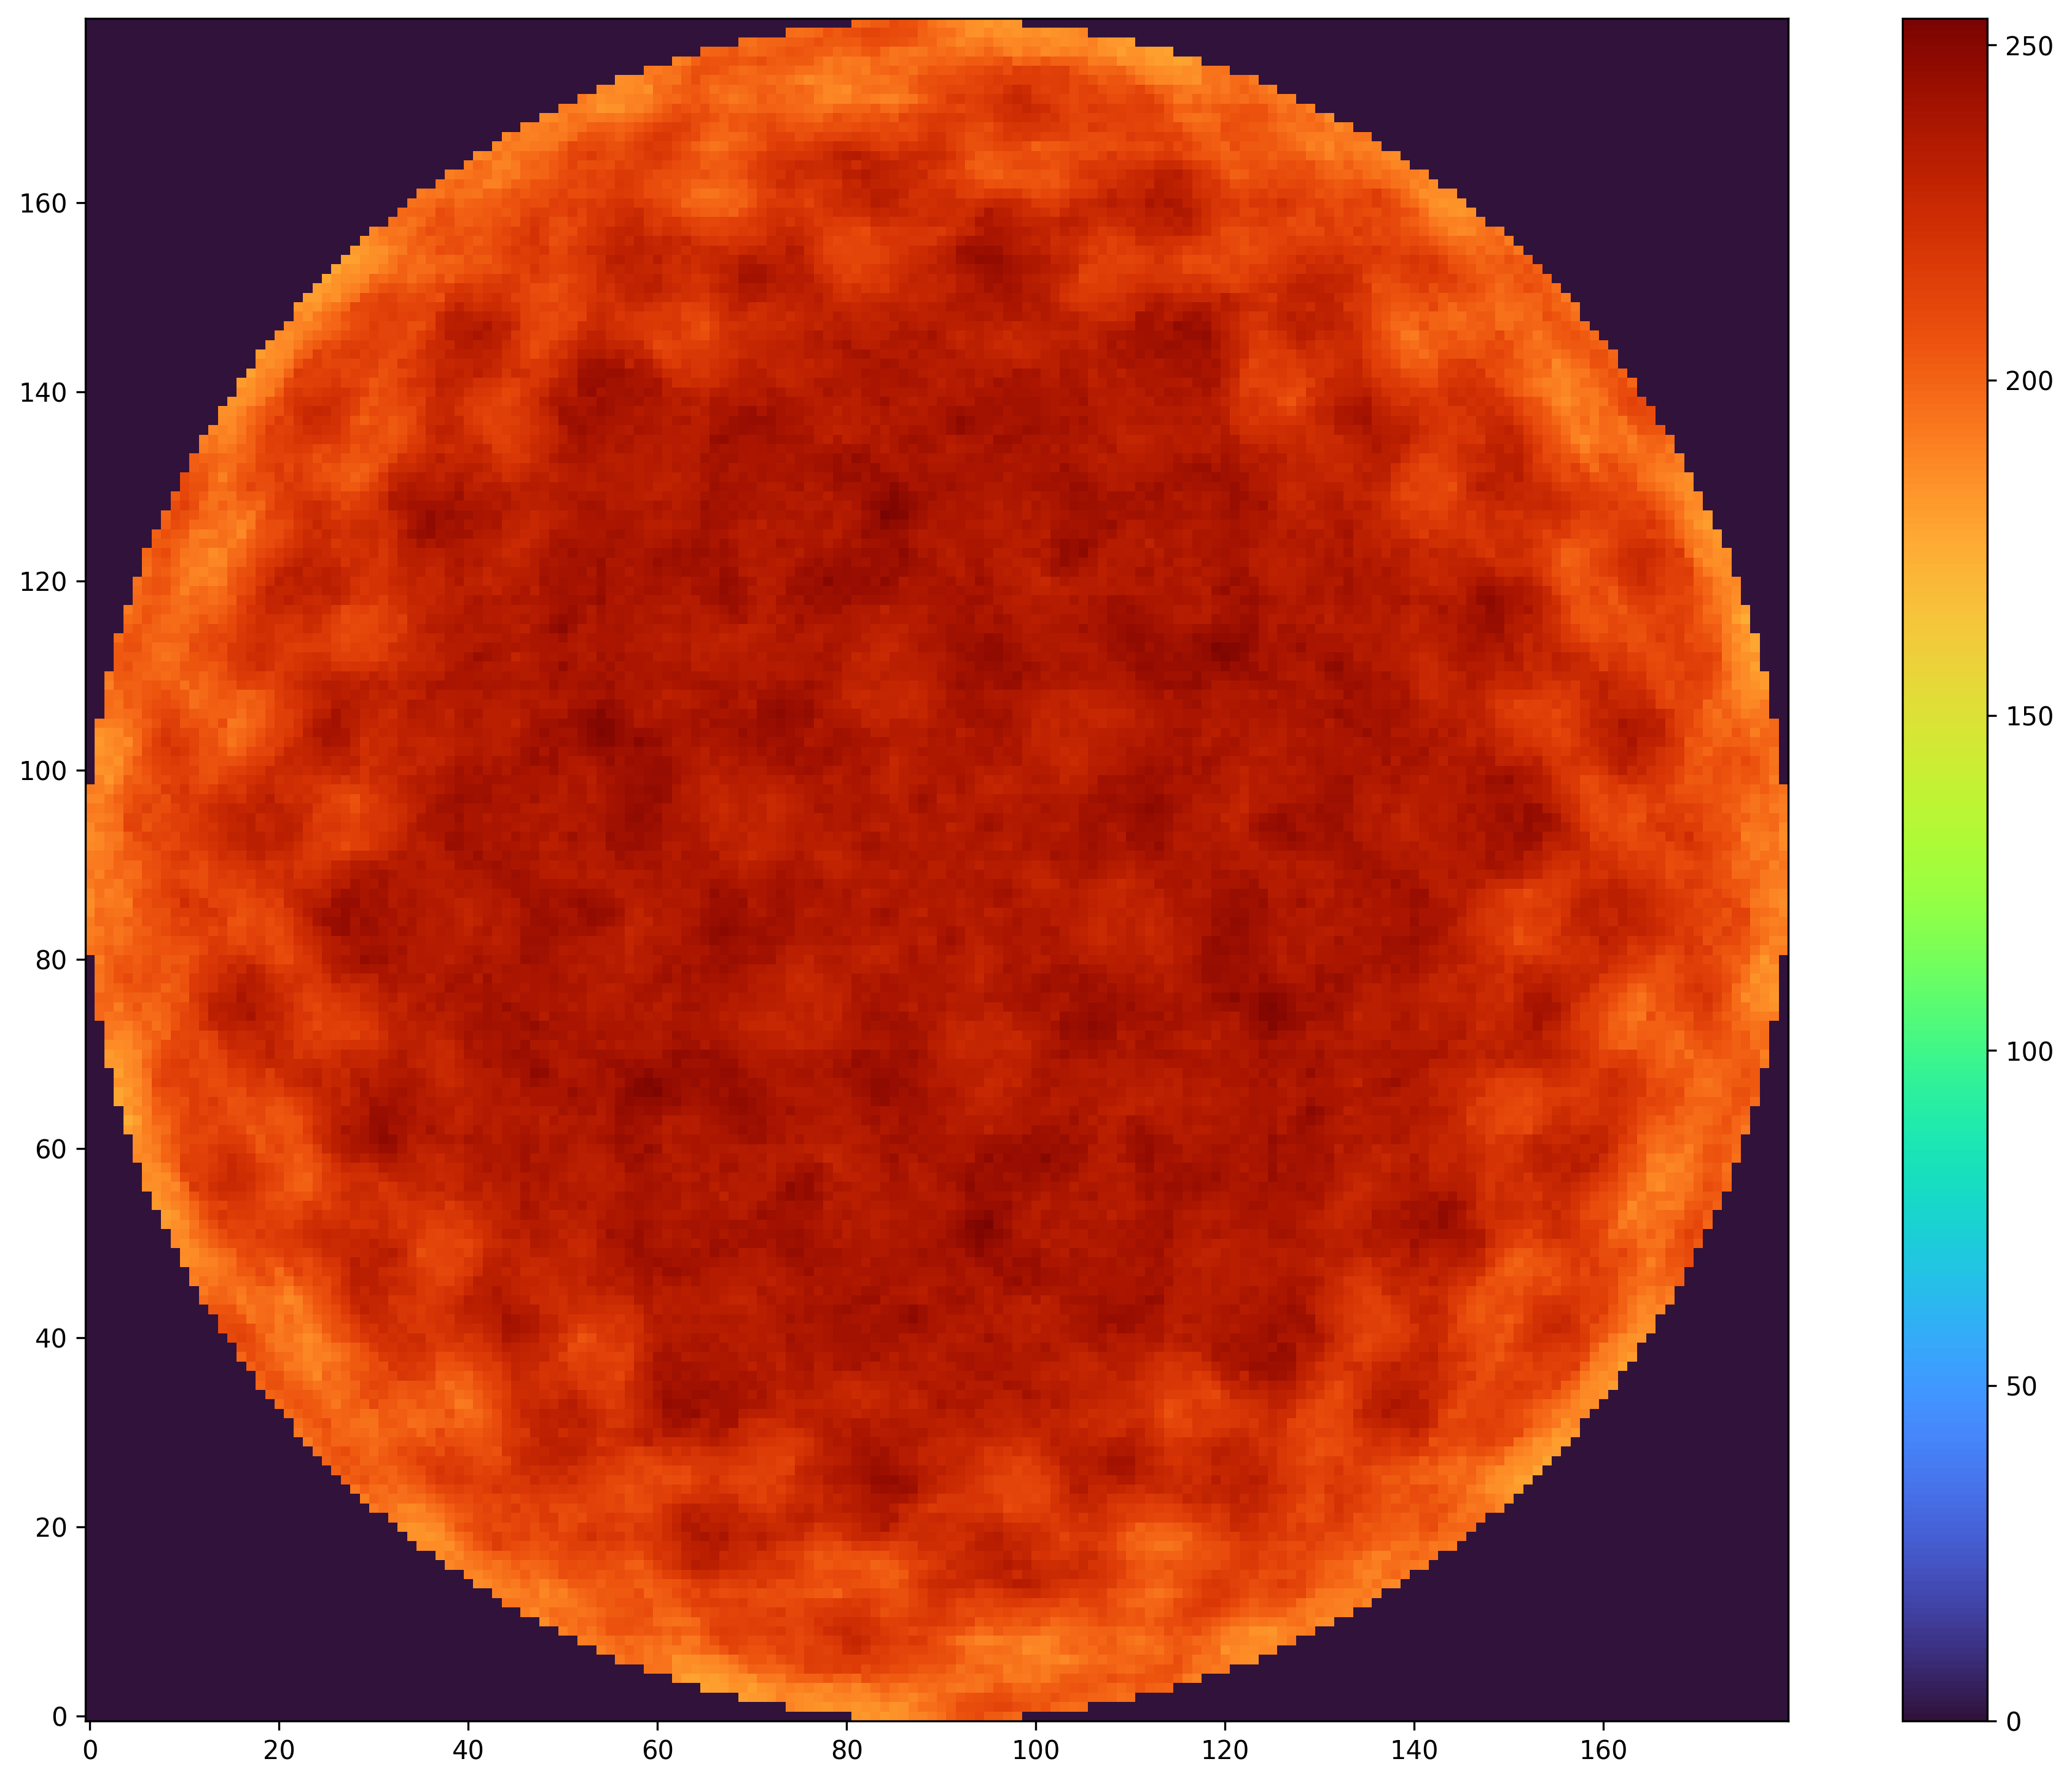

In [111]:

fig, ax = plt.subplots()
imshow_obj=ax.imshow(mpiImage4_2d, cmap=matplotlib.colormaps.get_cmap('turbo'),origin='lower')
fig.colorbar(imshow_obj)

0.4
0.41250000000000003
0.42500000000000004
0.43750000000000006
0.45000000000000007
0.4625000000000001
0.4750000000000001
0.4875000000000001
0.5000000000000001
0.5125000000000002
0.5250000000000001
0.5375000000000001
0.5500000000000002
0.5625000000000002
0.5750000000000002
0.5875000000000001
0.6000000000000002
0.6125000000000003
0.6250000000000002
0.6375000000000002
0.6500000000000002
0.6625000000000003
0.6750000000000003
0.6875000000000002
0.7000000000000003
0.7125000000000004
0.7250000000000003
0.7375000000000003


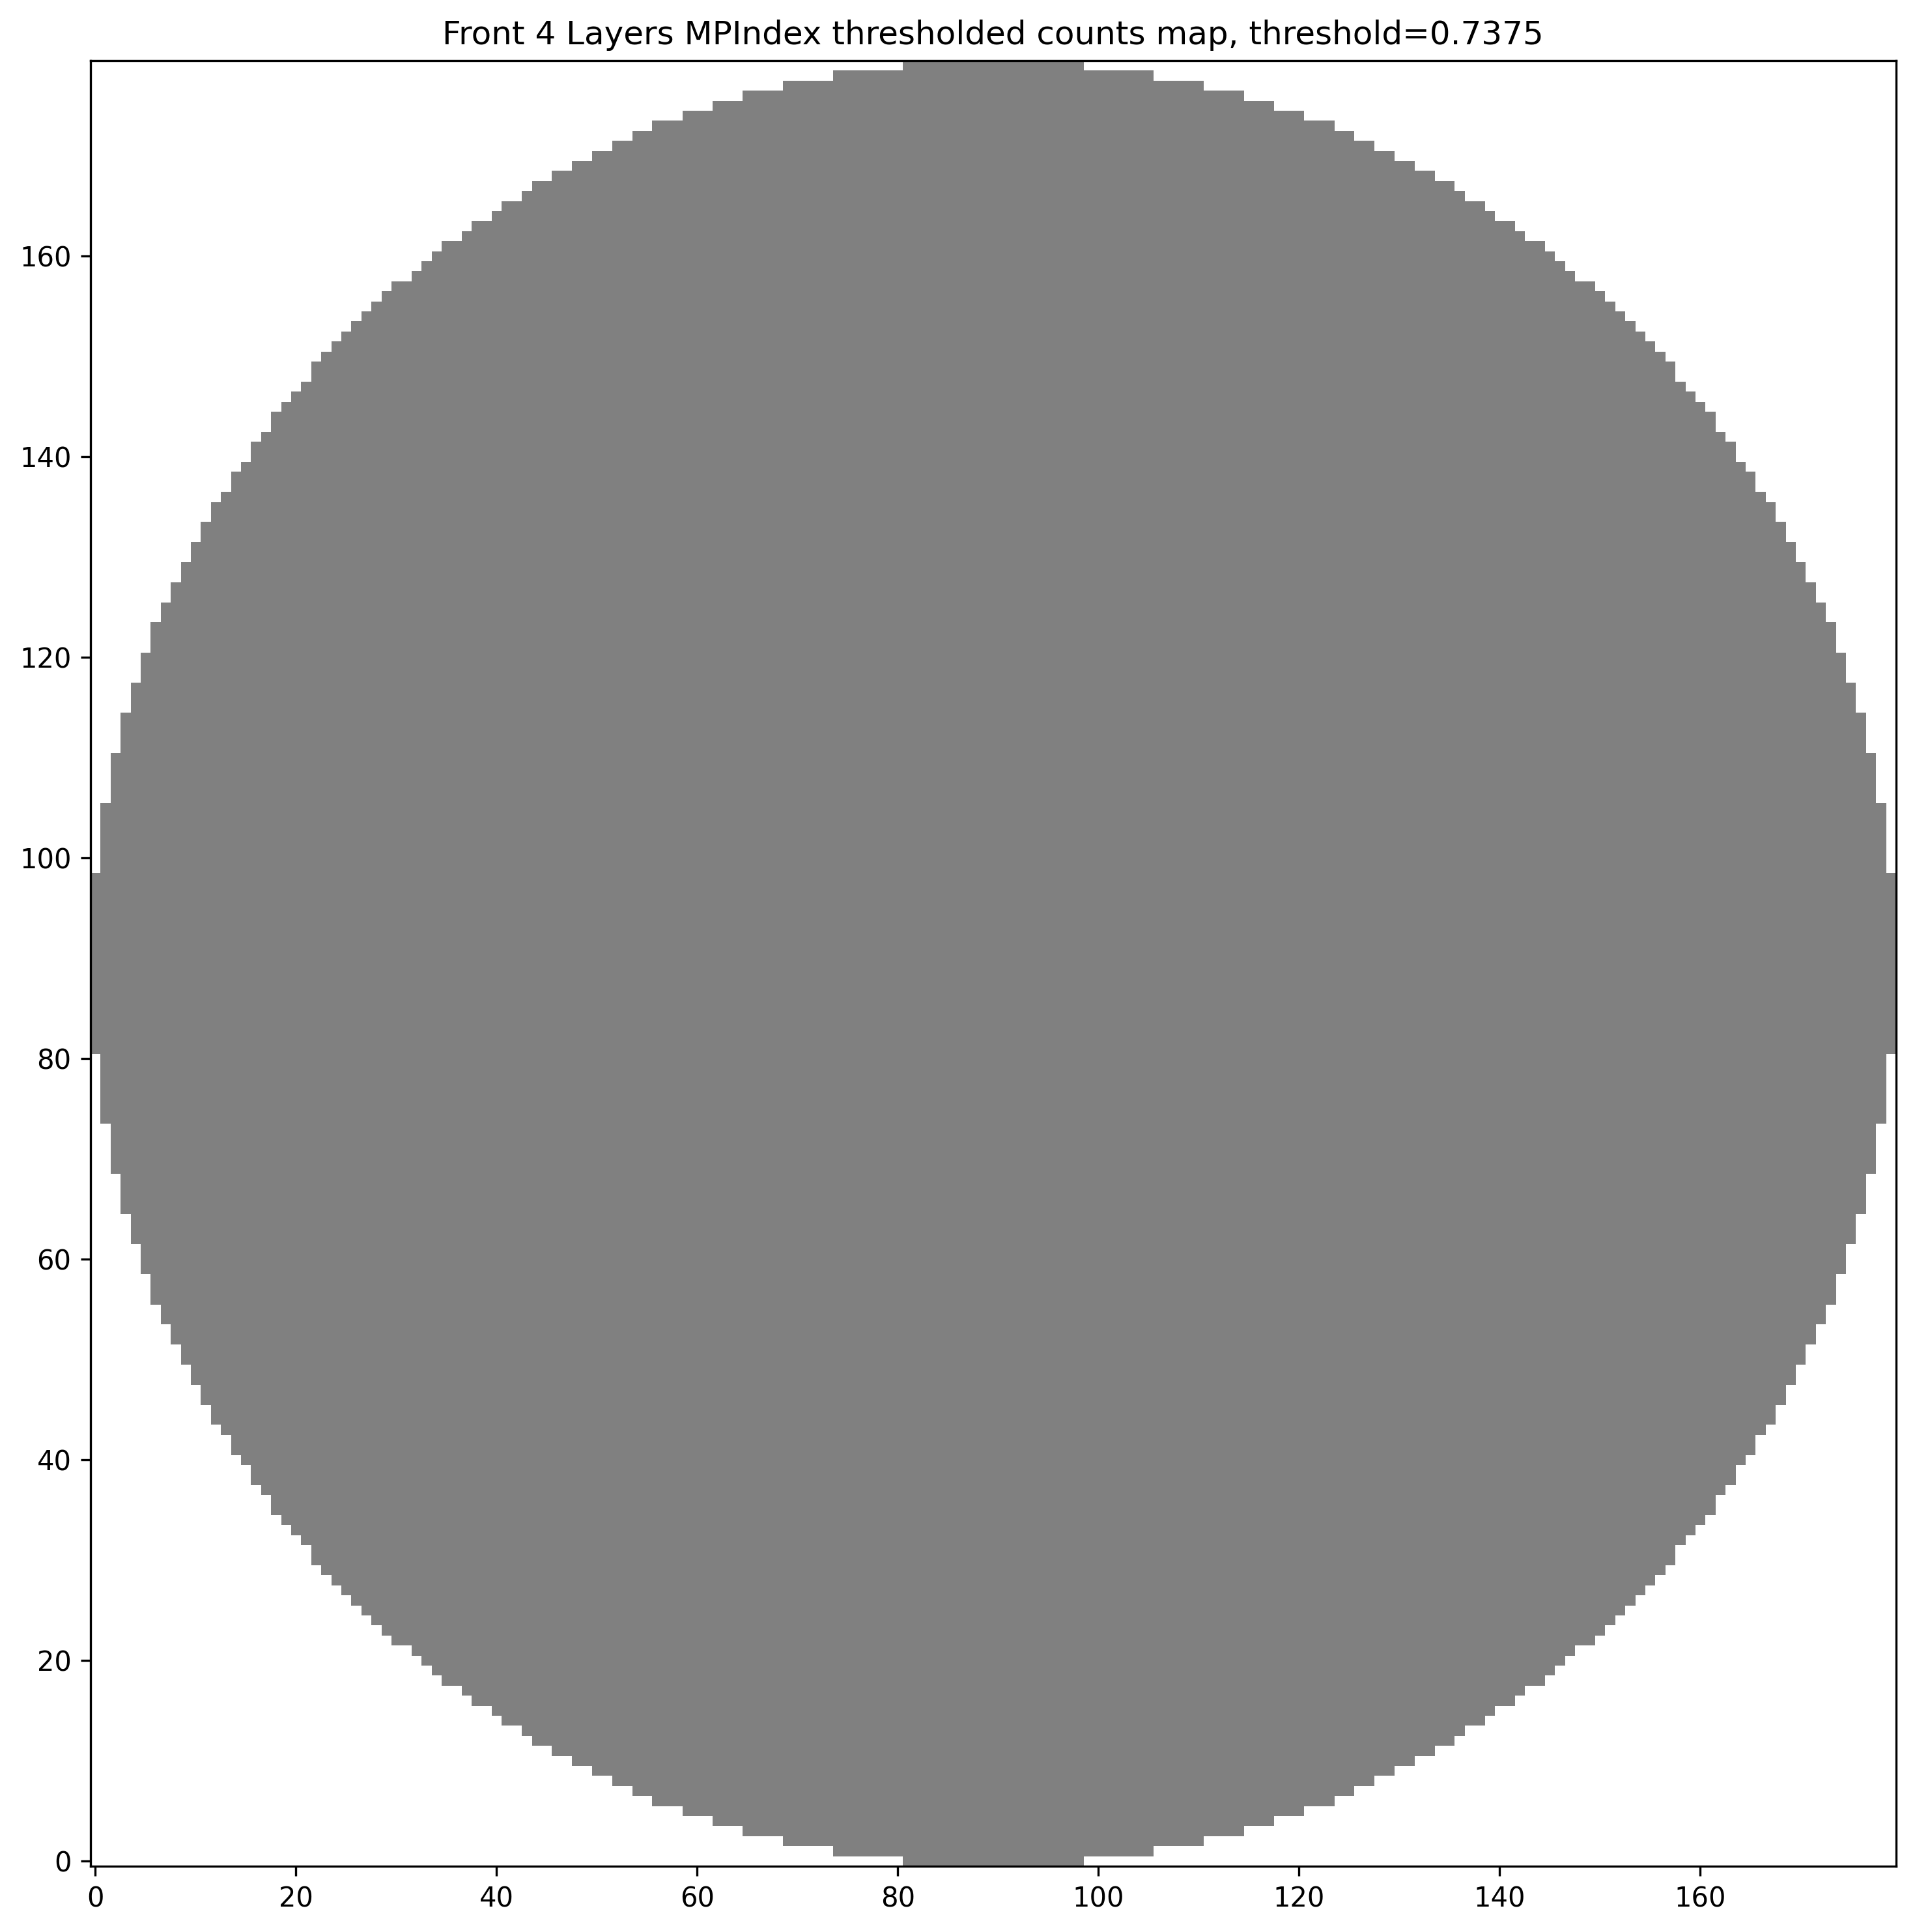

In [157]:
fig, ax = plt.subplots()
for threshold in np.arange(0.4, 0.75, 0.0125):
    ax.cla()
    print(threshold)
    mpiImage4_2d_thresholded = np.where(
        mpiImage4_2d == 0, np.nan, mpiImage4_2d)
    mpiImage4_2d_thresholded[np.where(
        mpiImage4_2d_thresholded < threshold)] = 0
    imshow_obj = ax.imshow(mpiImage4_2d_thresholded,
                           cmap=matplotlib.colormaps.get_cmap('gray'), origin='lower')
    ax.set_title("Front 4 Layers MPIndex thresholded counts map, threshold=%.4f"%threshold)
    cb=fig.colorbar(imshow_obj)
    fig.savefig("front4layers/front4LayersMap_counts_threshold%.4f.png" % threshold)
    cb.remove()

0.3
0.3125
0.325
0.3375
0.35000000000000003
0.36250000000000004
0.37500000000000006
0.38750000000000007
0.4000000000000001
0.4125000000000001
0.4250000000000001
0.4375000000000001
0.4500000000000001
0.46250000000000013
0.47500000000000014
0.48750000000000016


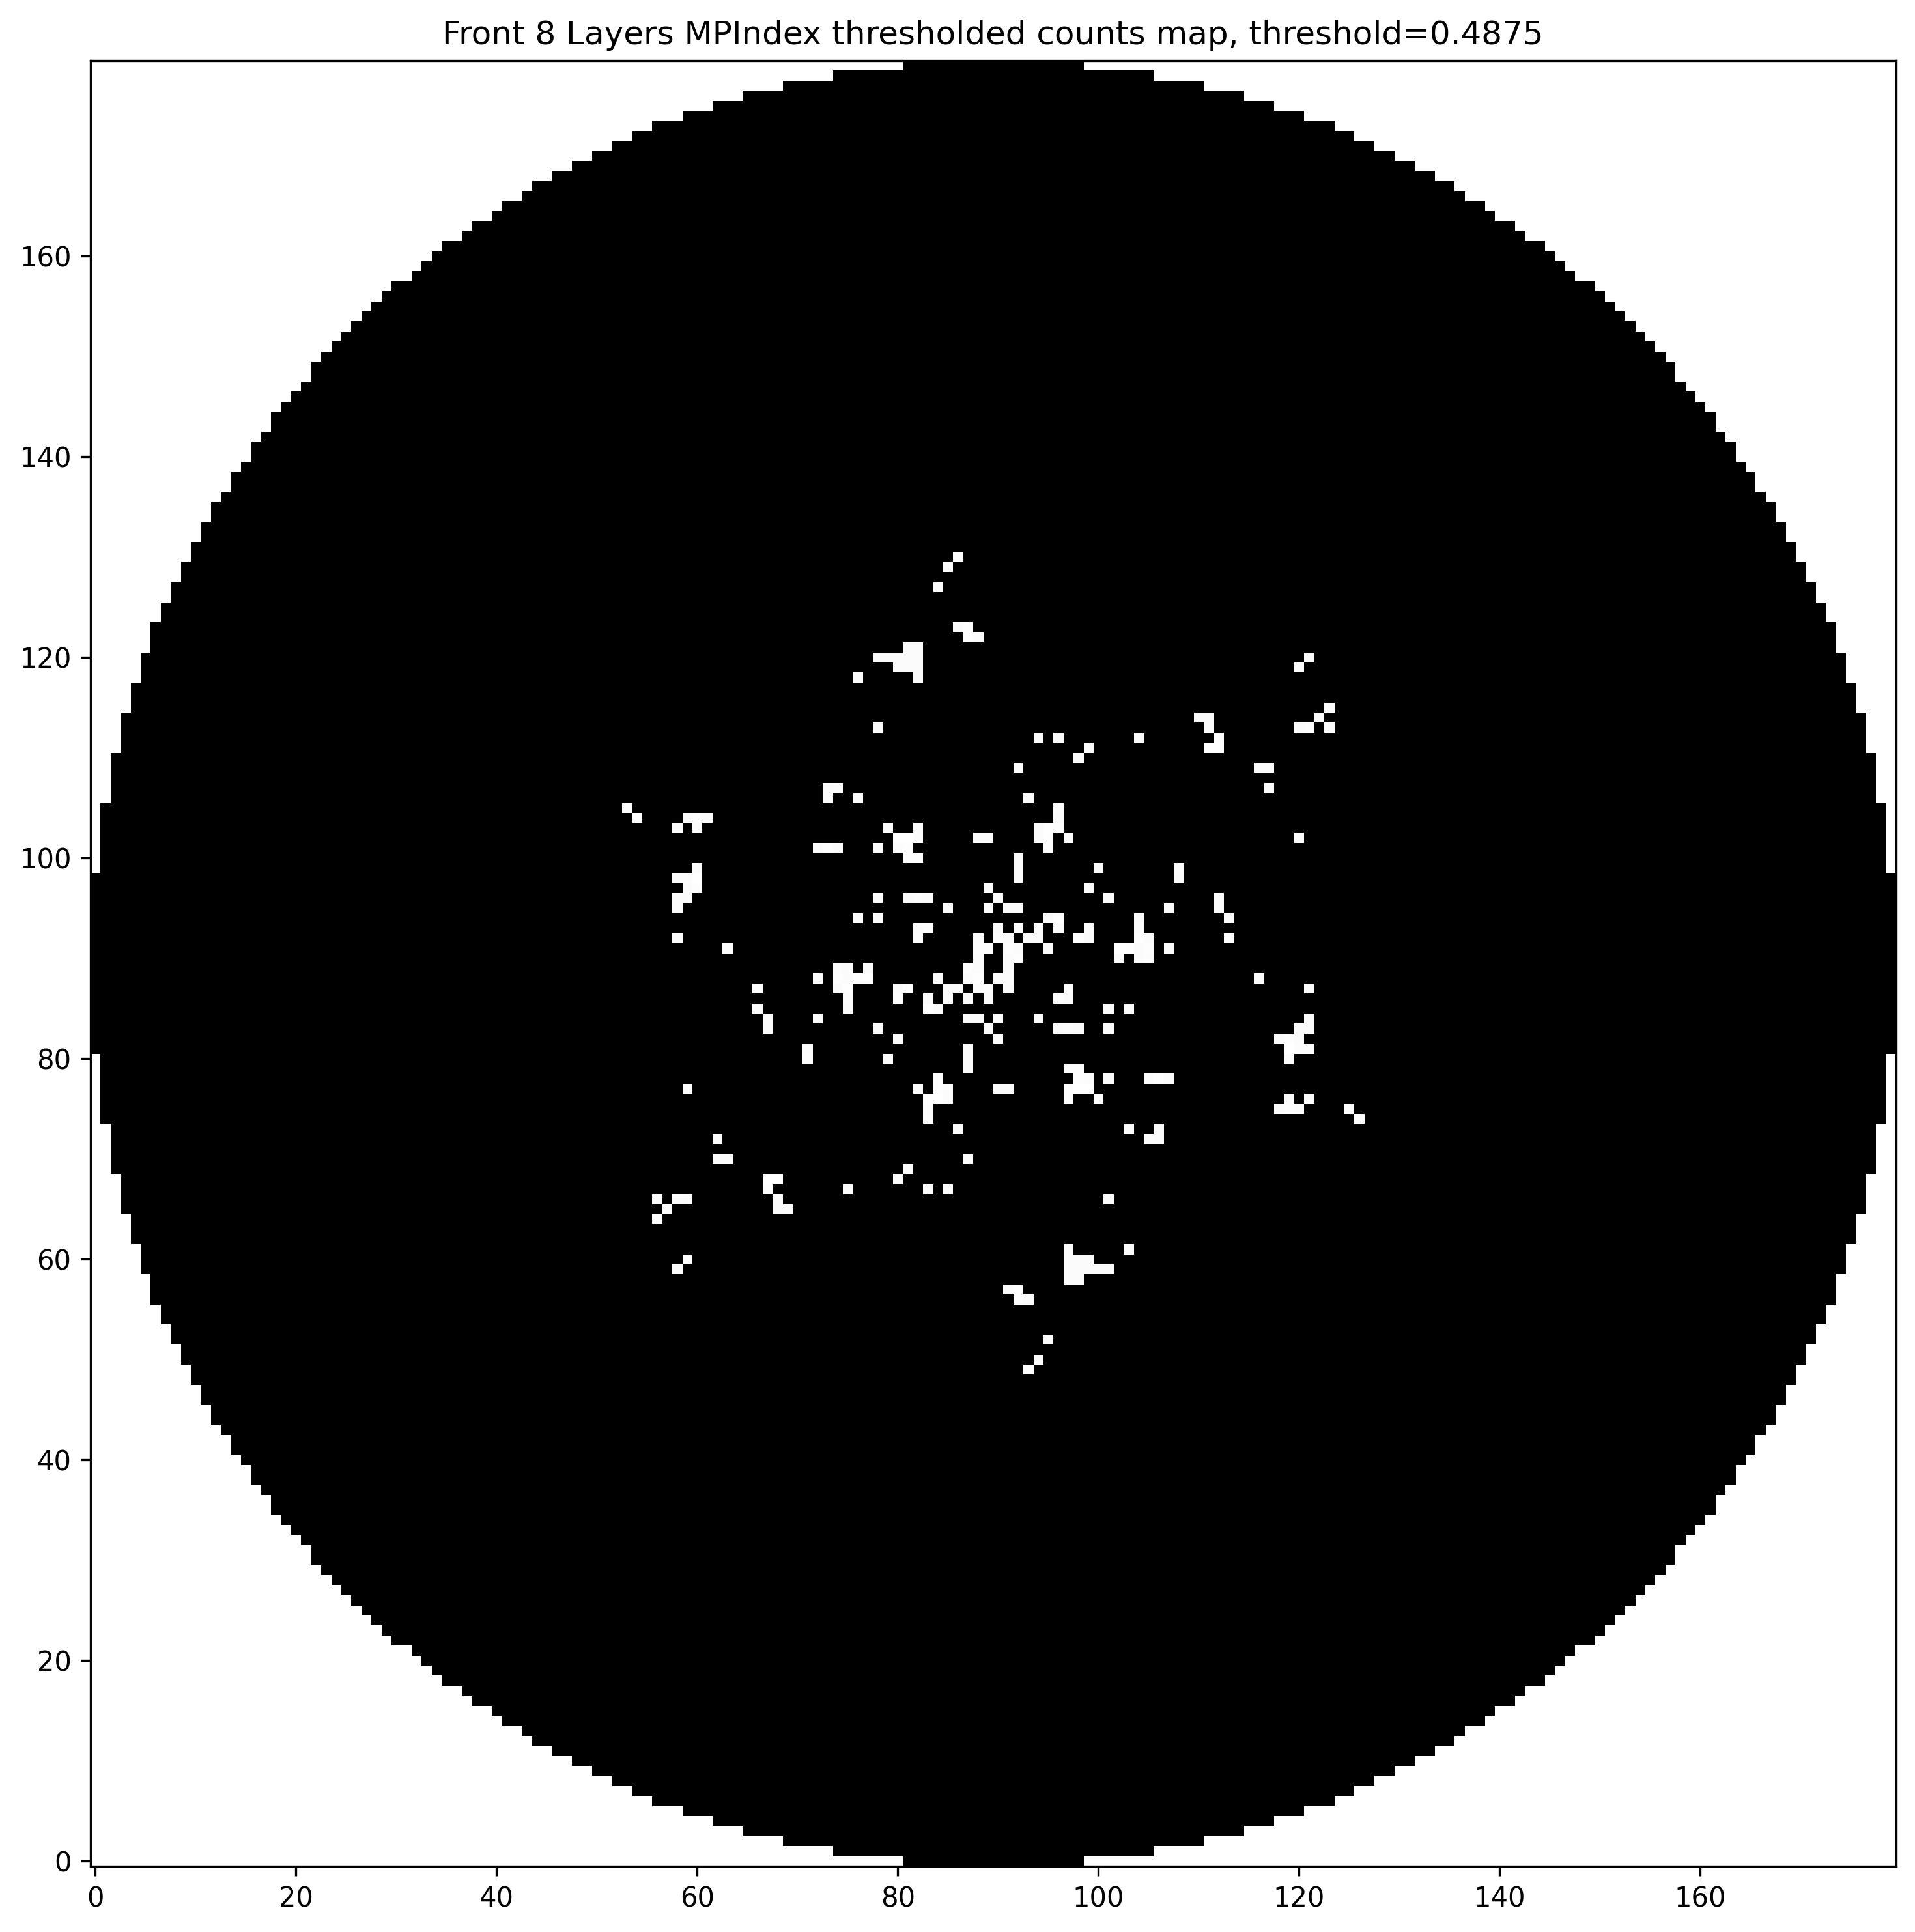

In [156]:
fig, ax = plt.subplots()
for threshold in np.arange(0.3, 0.5, 0.0125):
    ax.cla()
    print(threshold)
    mpiImage8_2d_thresholded = np.where(
        mpiImage8_2d == 0, np.nan, mpiImage8_2d)
    mpiImage8_2d_thresholded[np.where(
        mpiImage8_2d_thresholded < threshold)] = 0
    imshow_obj = ax.imshow(mpiImage8_2d_thresholded,
                           cmap=matplotlib.colormaps.get_cmap('gray'), origin='lower')
    ax.set_title("Front 8 Layers MPIndex thresholded counts map, threshold=%.4f"%threshold)
    cb=fig.colorbar(imshow_obj)
    fig.savefig("front8layers/front8LayersMap_counts_threshold%.4f.png" % threshold)
    cb.remove()